# Initialization 

## Parameters


In [1]:
#Parameters:
NoOfUsers = 30
cloud_server_cost = 1000 #($/per server/hour)
edge_server_cost = 100   #($/per server/hour)
propagation_delay_constant = 1.5  # in ms/km
routing_cost = 0.09 #($/GB)

## Initialize Network from XML

Debug: Added Node N1 - x: 237.0, y: 338.0
Debug: Added Node N2 - x: 130.0, y: 207.0
Debug: Added Node N3 - x: 126.0, y: 531.0
Debug: Added Node N4 - x: 209.0, y: 523.0
Debug: Added Node N5 - x: 345.0, y: 232.0
Debug: Added Node N6 - x: 95.0, y: 350.0
Debug: Added Node N7 - x: 302.0, y: 404.0
Debug: Added Node N8 - x: 161.0, y: 454.0
Debug: Added Node N9 - x: 394.0, y: 499.0
Debug: Added Node N10 - x: 389.0, y: 656.0
Debug: Added Node N11 - x: 237.0, y: 645.0
Debug: Added Node N12 - x: 277.0, y: 70.0
Debug: Added Node N13 - x: 540.0, y: 147.0
Debug: Added Node N14 - x: 592.0, y: 503.0
Debug: Added Node N15 - x: 490.0, y: 349.0
Debug: Added Node N16 - x: 463.0, y: 543.0
Debug: Added Node OhioCloud - x: -400.1383141847919, y: -830.0059209290719
Debug: Added Node OregonCloud - x: -430.8275515896039, y: -120.55721609633432
Debug: Processing link 1 - Source: N1, Destination: N2
Link ID: 1, Source: N1, Destination: N2, Capacity: 1000.0, Cost: 44400.0
Debug: Processing link 2 - Source: N1, Des

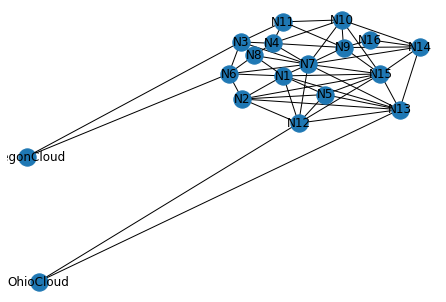

In [2]:

# Importing required libraries
import random
import networkx as nx   # for creating and manipulating graphs
import matplotlib.pyplot as plt   # for visualizing graphs

# Importing required functions
import PerformanceAnalysis.MeasureStatistics as MeasureStatistics  # to measure network statistics
import SearchAlgos.PageRank as  PageRank  # to compute node rankings based on pagerank

# Importing a user-defined function to read network data from XML file
from Import_NetworkFromXML_backup import *



# Defining a function to convert nodes in the XML network dictionary to nodes in networkx graph
def convert_nodes(G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))
        print(f"Debug: Added Node {node_id} - x: {x_cor}, y: {y_cor}")  # Debug print



#Function to convert links in the XML network dictionary to edges in NetworkX graph

def convert_links(G, nodes, links):
    for link_id, link in enumerate(links.keys(), 1):
        source = links[link].get("source")
        dest = links[link].get("destination")
        
        print(f"Debug: Processing link {link_id} - Source: {source}, Destination: {dest}")  # Debug print

        additionalModules = links[link].get('additionalModules')
        
        if additionalModules:
            addModule = additionalModules.get('addModule')
            if addModule:
                capacity = addModule.get("capacity")
                cost = addModule.get("cost")
                G.add_edge(source, dest, capacity=float(capacity), cost=float(cost))
                print(f"Link ID: {link_id}, Source: {source}, Destination: {dest}, Capacity: {capacity}, Cost: {cost}")
            else:
                print(f"Link ID: {link_id} has no 'addModule' in 'additionalModules'.")
        else:
            print(f"Link ID: {link_id} has no additional modules.")

# Defining the name of the network and creating an empty networkx graph
network_name = "newyork.xml"
G = nx.Graph()

# Defining the path to the network XML file and reading the network data from the file
path = 'Networks/'
from_xml = read_XMLnetwork (path+network_name)

# Extracting nodes, links, and demands data from the network data dictionary
nodes = from_xml[0]
links = from_xml[1]


# Converting nodes and links data to nodes and edges in networkx graph
convert_nodes(G,nodes)
convert_links(G,nodes,links)


# Drawing the networkx graph with node positions and other attributes
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300, style = "solid")

import matplotlib.pyplot as plt
import networkx as nx

# Draw the graph
#fig, ax = plt.subplots(figsize=(10, 10))  # you can change the figure size as needed

# # Set axis limits
# ax.set_xlim([-500, 500])  # Adjust limits to fit your specific case
# ax.set_ylim([-1000, 1000])

# nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300, ax=ax)

# plt.show()


print(G)






In [3]:
def print_link_costs(G):
    for source, dest, attributes in G.edges(data=True):
        cost = attributes.get('cost', 'N/A')  # Retrieves the cost attribute, returns 'N/A' if not found
        print(f"Link from {source} to {dest} has a cost of {cost}")

print_link_costs(G)


Link from N1 to N2 has a cost of 44400.0
Link from N1 to N5 has a cost of 59600.0
Link from N1 to N6 has a cost of 59600.0
Link from N1 to N7 has a cost of 74800.0
Link from N1 to N8 has a cost of 74800.0
Link from N1 to N12 has a cost of 74800.0
Link from N1 to N13 has a cost of 105200.0
Link from N1 to N15 has a cost of 90000.0
Link from N2 to N5 has a cost of 29200.0
Link from N2 to N6 has a cost of 59600.0
Link from N2 to N12 has a cost of 74800.0
Link from N2 to N13 has a cost of 105200.0
Link from N2 to N15 has a cost of 105200.0
Link from N3 to N4 has a cost of 59600.0
Link from N3 to N6 has a cost of 59600.0
Link from N3 to N7 has a cost of 59600.0
Link from N3 to N8 has a cost of 29200.0
Link from N3 to N11 has a cost of 74800.0
Link from N3 to OregonCloud has a cost of 226800.0
Link from N4 to N7 has a cost of 74800.0
Link from N4 to N8 has a cost of 59600.0
Link from N4 to N9 has a cost of 105200.0
Link from N4 to N10 has a cost of 90000.0
Link from N4 to N11 has a cost of 2

## Measure Infrastructure Statistics

In [4]:
# Calculating shortest paths between all pairs of nodes in the networkx graph
sp = dict(nx.all_pairs_shortest_path(G))

# calling the measure_statistics function and passing the networkx graph G as a parameter
MeasureStatistics.topology_statistics(G)

# calling the assortativity_measure function and passing the networkx graph G as a parameter
MeasureStatistics.assortativity_measure(G)

pagerank_df = PageRank.compute_pagerank(G)
print("Page Rank Weights")
print(pagerank_df)

Topology Stats:
Density: 0.3464052287581699
Avg. shortest path length: 

1.8823529411764706
Avg. clustering coefficient: 0.6791446208112875
Assortativity 0.012805587892899862

Assortativity Stats:
18
0.3281733746130031
Erdos-Renyi assortativity: 0.003525752592201792 0.12247694620579162
Conf. model assortativity: -0.04258044889977555 0.15594761352627098
Real network value: 0.012805587892899862

Page Rank Weights
           name     value
6            N7  0.095813
14          N15  0.078552
12          N13  0.072393
0            N1  0.070751
8            N9  0.066395
11          N12  0.064178
2            N3  0.059555
5            N6  0.058272
13          N14  0.057273
3            N4  0.057031
9           N10  0.056094
1            N2  0.054920
7            N8  0.048026
4            N5  0.046534
10          N11  0.040859
17  OregonCloud  0.025026
15          N16  0.024509
16    OhioCloud  0.023818


## Approximations and Heuristics
Approximations of graph properties and Heuristic methods for optimization.

### import
These functions can be accessed using networkx.approximation.function_name

They can be imported using from networkx.algorithms import approximation or from networkx.algorithms.approximation import function_name

### Treewidth
Functions for computing treewidth decomposition.

Treewidth of an undirected graph is a number associated with the graph. It can be defined as the size of the largest vertex set (bag) in a tree decomposition of the graph minus one.

Wikipedia: Treewidth

treewidth_min_degree(G): Returns a treewidth decomposition using the Minimum Degree heuristic.

### To Implement:
1. Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. Allow options (ex. User_Spread).
2. Connect each user to nearest AP: Allow options (ex. SNR, Connected_Users, Access_Technology).
3. Generate demand for each user: Assign User -> Application (Define SFCn = {VNF1 + VNF2 + .... + VNFx}).
4. Create Placement Algorithm for each Placement Solution.
5. Create a Next Candidate Search Algorithm: Takes as an input (G, Users, Demamds).
6. Measure network statistics for each Placement Algorithm.
7. Generate logs for each Placement Algorithm.
8. Save logs in an output file.
9. Create function to plot from the logs.

## Generate Users
Here we will generate users

Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. 

Allow options (ex. User_Spread).

Nearest AP for user at (280, 335): N1 (Distance: 43.104524124504614)
Nearest AP for user at (280, 335): N1 (Distance: 43.104524124504614)
Nearest AP for user at (168, 253): N2 (Distance: 59.665735560705194)
Nearest AP for user at (168, 253): N2 (Distance: 59.665735560705194)
Nearest AP for user at (82, 511): N3 (Distance: 48.33218389437829)
Nearest AP for user at (82, 511): N3 (Distance: 48.33218389437829)
Nearest AP for user at (188, 553): N4 (Distance: 36.61966684720111)
Nearest AP for user at (188, 553): N4 (Distance: 36.61966684720111)
Nearest AP for user at (344, 201): N5 (Distance: 31.016124838541646)
Nearest AP for user at (344, 201): N5 (Distance: 31.016124838541646)
Nearest AP for user at (77, 327): N6 (Distance: 29.206163733020468)
Nearest AP for user at (77, 327): N6 (Distance: 29.206163733020468)
Nearest AP for user at (301, 398): N7 (Distance: 6.082762530298219)
Nearest AP for user at (301, 398): N7 (Distance: 6.082762530298219)
Nearest AP for user at (205, 412): N8 (Dista

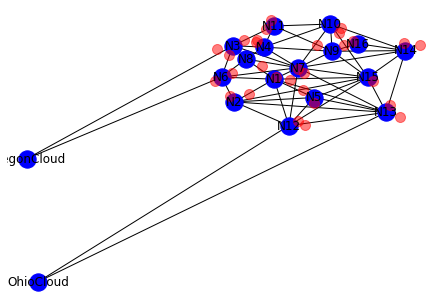

User to Node Association:
user_0 is associated with N1
user_1 is associated with N2
user_2 is associated with N3
user_3 is associated with N4
user_4 is associated with N5
user_5 is associated with N6
user_6 is associated with N7
user_7 is associated with N8
user_8 is associated with N9
user_9 is associated with N10
user_10 is associated with N11
user_11 is associated with N12
user_12 is associated with N13
user_13 is associated with N14
user_14 is associated with N15
user_15 is associated with N16
user_16 is associated with N1
user_17 is associated with N2
user_18 is associated with N3
user_19 is associated with N4
user_20 is associated with N5
user_21 is associated with N6
user_22 is associated with N7
user_23 is associated with N8
user_24 is associated with N16
user_25 is associated with N10
user_26 is associated with N11
user_27 is associated with N12
user_28 is associated with N13
user_29 is associated with N14


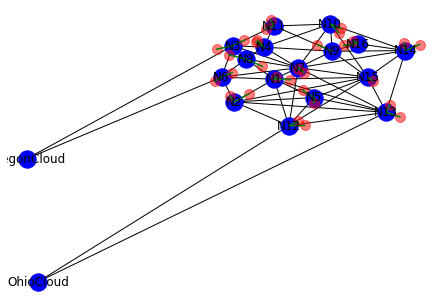

In [5]:
#users

# (1) Create a new graph, G_users, to represent the users.
#G_users = nx.Graph()

from scipy.spatial.distance import euclidean
import random
import networkx as nx
import matplotlib.pyplot as plt

# ... (other functions you've already defined) ...

# Function to find the nearest AP for a given user position
# def find_nearest_ap(G, user_pos):
#     min_distance = float('inf')
#     nearest_ap = None
#     nearest_pos = None

#     for ap, pos in nx.get_node_attributes(G, 'pos').items():
#         distance = euclidean(user_pos, pos)
#         if distance < min_distance:
#             min_distance = distance
#             nearest_ap = ap
#             nearest_pos = pos

#     return nearest_ap, nearest_pos

def find_nearest_ap(G, user_pos):
    min_distance = float('inf')
    nearest_ap = None
    nearest_pos = None

    for ap, pos in nx.get_node_attributes(G, 'pos').items():
        distance = euclidean(user_pos, pos)
        if distance < min_distance:
            min_distance = distance
            nearest_ap = ap
            nearest_pos = pos

    # Debug print to check the nearest AP found
    print(f"Nearest AP for user at {user_pos}: {nearest_ap} (Distance: {min_distance})")

    return nearest_ap, nearest_pos




def create_users(G, G_users, nodes, NoOfUsers):
    user_connections = []
    user_count = 0
    user_to_node_map = {}  # Dictionary to store user_id to node_id association

    while user_count < NoOfUsers:
        for node in nodes:
            node_id = nodes[node].get("id")
            if not "Cloud" in node_id:
                x_cor = nodes[node].get("x_cor")
                y_cor = nodes[node].get("y_cor")
                # randx = int(random.uniform(x_cor - 2.5, x_cor + 2.5))
                # randy = int(random.uniform(y_cor - 2.5, y_cor + 2.5))
                randx = int(random.uniform(x_cor - 50, x_cor + 50))
                randy = int(random.uniform(y_cor - 50, y_cor + 50))

                user_pos = (randx, randy)
                nearest_ap, nearest_pos = find_nearest_ap(G, user_pos)

                user_id = "user_" + str(user_count)
                G_users.add_node(user_id, pos=user_pos)
                nearest_ap, nearest_pos = find_nearest_ap(G, user_pos)

                if nearest_ap is None:
                    print(f"No AP found for user {user_id} at position {user_pos}")
                    continue  # Skip this user or handle the case when no AP is found

                user_connections.append((user_pos, nearest_pos))
                user_to_node_map[user_id] = nearest_ap

                #user_id = "user_" + str(user_count)
                #G_users.add_node(user_id, pos=user_pos)
                #user_connections.append((user_pos, nearest_pos))

                # Store the association in the dictionary
                #user_to_node_map[user_id] = nearest_ap

                user_count += 1
                if user_count >= NoOfUsers:
                    break

    return user_connections, user_to_node_map


# (5) Call the create_users function with the desired number of users


G_users = nx.Graph()



user_connections, user_to_node_map = create_users(G, G_users, nodes, NoOfUsers)

# Draw the original graph G and the graph of users G_users together
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)

plt.show()



# Updated create_users function to track user connections


# (rest of the existing code)

# ...
# Create a new graph for users and call create_users


# Print the user_id to node_id association
print("User to Node Association:")
for user_id, node_id in user_to_node_map.items():
    print(f"{user_id} is associated with {node_id}")
    # Add the 'associated_ap' attribute to each user node
    G_users.nodes[user_id]['associated_ap'] = node_id

users_ap = {}
for user_id in G_users:
    # Get the associated AP from the user node attributes
    associated_ap = G_users.nodes[user_id].get('associated_ap')

    # Check if the AP is valid (not None) before adding to the dictionary
    if associated_ap:
        users_ap[user_id] = {associated_ap: 1}
    else:
        print(f"No AP associated with {user_id}, skipping...")


# Draw the graphs and user connections
pos_G = nx.get_node_attributes(G, 'pos')
pos_G_users = nx.get_node_attributes(G_users, 'pos')

nx.draw(G, pos_G, with_labels=True, node_size=300, style="solid", node_color="blue")
nx.draw(G_users, pos_G_users, with_labels=False, node_size=100, style="dashed", node_color="red", alpha=0.5)

# Draw the connections between users and APs
for user_pos, ap_pos in user_connections:
    plt.plot([user_pos[0], ap_pos[0]], [user_pos[1], ap_pos[1]], color="green", linestyle="-")

plt.show()




## Compute Latency on all Links

In [6]:
import math

# Dictionary to store propagation delays
propagation_delays = {}

# Define a function to calculate the distance between two nodes based on their x, y coordinates
def calculate_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Define a function to compute and set the propagation delay for each link in the graph
def compute_propagation_delay(G):
    for (u, v, d) in G.edges(data=True):
        x1, y1 = G.nodes[u]['pos']
        x2, y2 = G.nodes[v]['pos']
        
        distance = calculate_distance(x1, y1, x2, y2)
        latency = distance * propagation_delay_constant
        
        G[u][v]['latency'] = latency  # Adding the latency attribute to the edge

        # Save this latency to the dictionary
        propagation_delays[(u, v)] = latency
        
        print(f"Link ({u}, {v}) - Distance: {distance}, Latency: {latency} ms")

# Call the function after the graph has been fully created
compute_propagation_delay(G)

# Debug print to verify using the dictionary
for (u, v), latency in propagation_delays.items():
    print(f"Link ({u}, {v}) - Latency: {latency} ms")



Link (N1, N2) - Distance: 169.14490828872147, Latency: 253.7173624330822 ms
Link (N1, N5) - Distance: 151.32745950421557, Latency: 226.99118925632337 ms
Link (N1, N6) - Distance: 142.50614021858848, Latency: 213.75921032788273 ms
Link (N1, N7) - Distance: 92.63368717696602, Latency: 138.95053076544903 ms
Link (N1, N8) - Distance: 138.67948658687772, Latency: 208.01922988031657 ms
Link (N1, N12) - Distance: 270.9686328710392, Latency: 406.45294930655876 ms
Link (N1, N13) - Distance: 358.1759344232943, Latency: 537.2639016349415 ms
Link (N1, N15) - Distance: 253.23901753086943, Latency: 379.85852629630415 ms
Link (N2, N5) - Distance: 216.44860821913363, Latency: 324.6729123287005 ms
Link (N2, N6) - Distance: 147.220922426128, Latency: 220.83138363919198 ms
Link (N2, N12) - Distance: 200.94277792446286, Latency: 301.41416688669426 ms
Link (N2, N13) - Distance: 414.36698710201324, Latency: 621.5504806530198 ms
Link (N2, N15) - Distance: 386.99353999776275, Latency: 580.4903099966441 ms
Lin

## Add Edge Device Attributes


In [7]:
# # (1) Import the json module
# import json

# # (2) Load the JSON data from the EdgeDevices.json file
# with open("Devices/EdgeDevices.json", "r") as file:
#     edge_devices_data = json.load(file)

# # (3) Create a function to associate edge devices with their attributes
# def associate_edge_devices(G, edge_devices_data):
#     edge_devices = edge_devices_data["edgeDevices"]
#     edge_servers = edge_devices_data["edgeServers"]

#     for node in G.nodes():
#         device = random.choice(edge_devices + edge_servers)
#         G.nodes[node]["name"] = device["name"]
#         G.nodes[node]["formFactor"] = device["formFactor"]
#         G.nodes[node]["architecture"] = device["architecture"]
#         G.nodes[node]["cpu"] = device["cpu"]
#         G.nodes[node]["memory"] = device["memory"]
#         G.nodes[node]["storage"] = device["storage"]
#         G.nodes[node]["source"] = device["source"]

# # (4) Call the function to update the attributes of the edge devices in the graph
# associate_edge_devices(G, edge_devices_data)


# # (4) Call the function to update the attributes of the edge devices in the graph
# associate_edge_devices(G, edge_devices_data)

# #Debug to print
# for node, attrs in G.nodes(data=True):
#     print(f"Node: {node}")
#     for attr_key, attr_value in attrs.items():
#         print(f"  {attr_key}: {attr_value}")
#     print()


## Assign Server Properties to each node in a uniform manner


In [8]:
# (1) Import the json module
import json

# (2) Load the JSON data from the EdgeDevices.json file
with open("Devices/EdgeDevices.json", "r") as file:
    edge_devices_data = json.load(file)

# Function to associate edge devices with their attributes
def associate_edge_devices(G, edge_devices_data):
    for node in G.nodes():
        # Check if the node name contains "cloud"
        if "cloud" in node.lower():
            print(node.lower())
            G.nodes[node]["name"] = "Huawei FusionServer Pro 2298 V5"
            G.nodes[node]["formFactor"] = 34253
            G.nodes[node]["architecture"] = "x86"
            G.nodes[node]["cpu"] = "75.6GHz"
            G.nodes[node]["memory"] = "3TB"
            G.nodes[node]["storage"] = "450TB"
            G.nodes[node]["source"] = "Edge_Device_FusionServerPro2298"
            G.nodes[node]["server_cost"] = cloud_server_cost
        else:
            # Assign Cisco HyperFlex HX220c Edge M5 attributes
            G.nodes[node]["name"] = "Cisco HyperFlex HX220c Edge M5"
            G.nodes[node]["formFactor"] = 16408
            G.nodes[node]["architecture"] = "x86"
            G.nodes[node]["cpu"] = "34.8GHz"
            G.nodes[node]["memory"] = "1TB"
            G.nodes[node]["storage"] = "5TB"
            G.nodes[node]["source"] = "Edge_Device_Cisco_HX220"
            G.nodes[node]["server_cost"] = edge_server_cost


                

# (4) Call the function to update the attributes of the edge devices in the graph
associate_edge_devices(G, edge_devices_data)


# Call the function to update the attributes of the edge devices in the graph
#associate_edge_devices(G)

# Debug to print
for node, attrs in G.nodes(data=True):
    print(f"Node: {node}")
    for attr_key, attr_value in attrs.items():
        print(f"  {attr_key}: {attr_value}")
    print()


ohiocloud
oregoncloud
Node: N1
  pos: (237.0, 338.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  storage: 5TB
  source: Edge_Device_Cisco_HX220
  server_cost: 100

Node: N2
  pos: (130.0, 207.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  storage: 5TB
  source: Edge_Device_Cisco_HX220
  server_cost: 100

Node: N3
  pos: (126.0, 531.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  storage: 5TB
  source: Edge_Device_Cisco_HX220
  server_cost: 100

Node: N4
  pos: (209.0, 523.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  storage: 5TB
  source: Edge_Device_Cisco_HX220
  server_cost: 100

Node: N5
  pos: (345.0, 232.0)
  name: Cisco HyperFlex HX220c Edge M5
  formFactor: 16408
  architecture: x86
  cpu: 34.8GHz
  memory: 1TB
  stora

## Assign Applications to users randomly to generate demand:



In [9]:
import json

# Function to associate user devices with their attributes
def associate_user_devices(G_users, traffic_json_path):
    # Load the JSON data from the Traffic.json file
    with open(traffic_json_path, "r") as file:
        traffic_data = json.load(file)
        
    traffic_statistics = traffic_data["trafficStatistics"]
    
    for user in G_users.nodes():
        random_stat = random.choice(traffic_statistics)
        
        G_users.nodes[user]["application"] = random_stat["application"]
        G_users.nodes[user]["bandwidth"] = sum(random_stat["bandwidth"]) / len(random_stat["bandwidth"])
        
        if isinstance(random_stat["latency"], list):
            G_users.nodes[user]["latency"] = sum(random_stat["latency"]) / len(random_stat["latency"])
        else:
            G_users.nodes[user]["latency"] = random_stat["latency"]
            
        G_users.nodes[user]["deviceDensity"] = random_stat["deviceDensity"]
        G_users.nodes[user]["source"] = random_stat["source"]

# Specify the path to Traffic.json
traffic_json_path = "Devices/Traffic.json"

# Call the function to update the attributes of the user devices in the graph
associate_user_devices(G_users, traffic_json_path)

# Debug to print
for node, attrs in G_users.nodes(data=True):
    print(f"Node: {node}")
    for attr_key, attr_value in attrs.items():
        if attr_key == "bandwidth":
            print(f"  {attr_key}: {attr_value} Mbps")
        elif attr_key == "latency":
            print(f"  {attr_key}: {attr_value} ms")
        elif attr_key == "deviceDensity":
            print(f"  {attr_key}: {attr_value} /km^2")
        else:
            print(f"  {attr_key}: {attr_value}")
    print()



Node: user_0
  pos: (280, 335)
  associated_ap: N1
  application: Connected Ambulance
  bandwidth: 1000.0 Mbps
  latency: 10 ms
  deviceDensity: 60 /km^2
  source: Cisotto2019

Node: user_1
  pos: (168, 253)
  associated_ap: N2
  application: Home Energy
  bandwidth: 0.0505 Mbps
  latency: 250.0 ms
  deviceDensity: 6000 /km^2
  source: Gungor

Node: user_2
  pos: (82, 511)
  associated_ap: N3
  application: Smart Grids
  bandwidth: 0.7505 Mbps
  latency: 10.5 ms
  deviceDensity: 6000 /km^2
  source: Schulz

Node: user_3
  pos: (188, 553)
  associated_ap: N4
  application: Smart Grids
  bandwidth: 0.7505 Mbps
  latency: 10.5 ms
  deviceDensity: 6000 /km^2
  source: Schulz

Node: user_4
  pos: (344, 201)
  associated_ap: N5
  application: Connected Ambulance
  bandwidth: 1000.0 Mbps
  latency: 10 ms
  deviceDensity: 60 /km^2
  source: Cisotto2019

Node: user_5
  pos: (77, 327)
  associated_ap: N6
  application: Autonomous Traffic
  bandwidth: 5.025 Mbps
  latency: 10 ms
  deviceDensity: 

## Assign each application and its users to Containers (VNFs + Microservices)

In [10]:
import json
import networkx as nx

# Function to associate each application with its corresponding containers
def associate_app_with_containers(G_users, containers_json_path):
    # Load the JSON data from the containers.json file
    with open(containers_json_path, 'r') as f:
        containers_data = json.load(f)
        
    # Initialize dictionary to hold application-to-user mapping
    app_to_users = {}
    
    # Loop through each user and get their application
    for user, attrs in G_users.nodes(data=True):
        app = attrs['application']
        if app not in app_to_users:
            app_to_users[app] = []
        app_to_users[app].append(user)
    
    # Loop through each application data in containers_data list
    for app_data in containers_data:
        app_name = app_data['application']
        users = app_to_users.get(app_name, [])
        
        # If there are users associated with this app
        if users:
            print(f"Application: {app_name}")
            print("Users associated:", users)
            
            # Print containers in service chain order
            containers = app_data['vnfs'] + app_data['microservices']
            print("Containers to be used in order:", [c['name'] for c in containers])
            
            # Calculate and print total resource requirements
            total_cpu = sum(float(c['cpu']) for c in containers)
            total_mem = sum(float(c['memory']) for c in containers)
            total_storage = sum(float(c['storage']) for c in containers)
            
            print(f"Total CPU requirements: {total_cpu} GHz")
            print(f"Total Memory requirements: {total_mem} GB")
            print(f"Total Storage requirements: {total_storage} GB")
            print("---------------------------------------------------")
    return app_to_users, containers_data

# Specify the path to containers.json
containers_json_path = 'Devices/containers.json'

# Call the function
app_to_users, containers_data = associate_app_with_containers(G_users, containers_json_path)




Application: Road Safety
Users associated: ['user_21']
Containers to be used in order: ['Firewall', 'VPN', 'Safety Protocol', 'Alert Notification']
Total CPU requirements: 4.5 GHz
Total Memory requirements: 7.5 GB
Total Storage requirements: 8.5 GB
---------------------------------------------------
Application: City Surveillance
Users associated: ['user_12', 'user_24']
Containers to be used in order: ['Proxy', 'Data Storage', 'Face Recognition', 'License Plate Recognition']
Total CPU requirements: 11.0 GHz
Total Memory requirements: 36.0 GB
Total Storage requirements: 85.0 GB
---------------------------------------------------
Application: Structural Health
Users associated: ['user_8', 'user_13', 'user_19', 'user_20', 'user_23']
Containers to be used in order: ['Cache', 'Data Analysis', 'Vibration Analysis', 'Health Reporting']
Total CPU requirements: 5.0 GHz
Total Memory requirements: 8.0 GB
Total Storage requirements: 18.0 GB
---------------------------------------------------
Appli

# Placement

## Random Microservice Placement + Routing

In [11]:
from collections import defaultdict
import random
import networkx as nx

# Initialize data structures to hold server and link states
server_utilization_random = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_random = defaultdict(float)
accepted_users_count_random = 0
rejected_users_count_random = 0
total_routing_cost_random = 0.0
link_cost_random = defaultdict(float)  # New dictionary to store the cost of each link
total_propagation_delay_random = 0.0  # Initialize variable to hold total propagation delay
# Initialize additional counters
total_edge_servers_used_random = 0
total_cloud_servers_used_random = 0
total_cost_random = 0




# Function to convert string capacity to float (e.g., '3TB' to 3000.0)
def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'x' in capacity_str:
        # Assuming the format is 'cores x speed' and you want total GHz
        cores, speed = capacity_str.split('x')
        return float(cores) * float(speed)
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
    else:
        return float(capacity_str)


# Function to find a path that can handle the given bandwidth
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=10):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            link_capacity = G[path[i]][path[i + 1]]['capacity']  # Assuming capacity is in Mbps
            if link_utilization_random[link] + bandwidth > link_capacity:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None


accepted_users_count_random = 0
rejected_users_count_random = 0

# Random Microservice Placement
for app_name, users in app_to_users.items():
    # Select a random server (node) for this application
    server = random.choice(list(G.nodes()))
    
    # Get the total resource requirements for this application
    container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
    if container_list:
        containers = container_list[0]
    else:
        print(f"No containers found for the application {app_name}")
        continue  # or handle this case appropriately

    total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
    total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
    total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
    
    # Check server capacity and update server utilization
    server_capacity = G.nodes[server]
    if server_utilization_random[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_capacity['cpu']) and \
        server_utilization_random[server]['memory'] + total_mem <= convert_capacity_to_float(server_capacity['memory']) and \
        server_utilization_random[server]['storage'] + total_storage <= convert_capacity_to_float(server_capacity['storage']):
        server_utilization_random[server]['cpu'] += total_cpu
        server_utilization_random[server]['memory'] += total_mem
        server_utilization_random[server]['storage'] += total_storage
        # Check if the server is an edge or cloud server and update the counter
        if "cloud" in server.lower():
            total_cloud_servers_used_random += 1
        else:
            total_edge_servers_used_random += 1
    else:
        print(f"Server capacity exceeded for server {server}")
        continue

    # Routing and link utilization
    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            # Update link utilization and total routing cost along this path
            # for i in range(len(path) - 1):
            #     link = (path[i], path[i + 1])
            #     link_utilization_random[link] += bandwidth
            #     total_routing_cost_random += G[path[i]][path[i + 1]]['cost']
            #     accepted_users_count_random += 1
            # Update link utilization and total routing cost along this path
            user_propagation_delay = 0.0  # Initialize the user's total propagation delay to zero
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_random[link] += bandwidth
                link_cost = bandwidth * 1e-3 * routing_cost
                #link_cost = bandwidth * 1e-3 * G[path[i]][path[i + 1]]['cost']  # bandwidth in Gbps * cost ($/Gb)
                link_cost_random[link] += link_cost  # Accumulate cost for this link
                #total_routing_cost_random += G[path[i]][path[i + 1]]['cost']
                total_routing_cost_random += link_cost  # Update the total routing cost

                # Add up the propagation delay for the current link to the user's total
                user_propagation_delay += propagation_delays.get(link, 0)
                accepted_users_count_random += 1
             # Add this user's propagation delay to the total
            total_propagation_delay_random += user_propagation_delay
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_random += 1

# Print server and link utilization
# print("Server Utilization:")
# for server, util in server_utilization_random.items():
#     print(f"Server {server}: CPU = {util['cpu']} GHz, Memory = {util['memory']} GB, Storage = {util['storage']} GB")
    
# print("\nLink Utilization:")
# for link, bandwidth in link_utilization_random.items():
#     print(f"Link {link}: {bandwidth} Mbps")

# Print total routing cost
print(f"\nTotal Routing Cost: {total_routing_cost_random}")

#Print total accepted users
print(f"\nTotal Accepted Users: {accepted_users_count_random}")
accepted_percentage_random = accepted_users_count_random/NoOfUsers*100
print(f"\nPercentage of Accepted Users: {accepted_percentage_random}%")


#Print total rejected users
print(f"\nTotal Rejected Users: {rejected_users_count_random}")
rejected_percentage_random = rejected_users_count_random/NoOfUsers*100
print(f"\nPercentage of Rejected Users: {rejected_percentage_random}%")


def print_total_propagation_delay():
    print(f"\nTotal Propagation Delay: {total_propagation_delay_random} ms")

print_total_propagation_delay()

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_random}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_random}")

total_cost_random = total_routing_cost_random + total_edge_servers_used_random*edge_server_cost + total_cloud_servers_used_random*cloud_server_cost

print(f"\nTotal cost: {total_cost_random}")


TypeError: list indices must be integers or slices, not str

### Ploting Random Microservice Placement

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Server Utilization Bar Graph
servers = list(server_utilization_random.keys())
cpu_util = [server_utilization_random[s]['cpu'] for s in servers]
mem_util = [server_utilization_random[s]['memory'] for s in servers]
storage_util = [server_utilization_random[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

#**********************************************************************************************************************

# Link Utilization Bar Graph
links = list(link_utilization_random.keys())
bandwidth_util = [link_utilization_random[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()


#**********************************************************************************************************************

# Create a new figure for Accepted and Rejected Users
y_max = 100  # Adjust this value as needed

# Create a new figure for Accepted and Rejected Users
plt.figure(figsize=(10, 6))

# Bar positions for Accepted and Rejected Users
r4 = [x + barWidth for x in r3]

user_percentages = [accepted_percentage_random, rejected_percentage_random]
user_labels = ['Accepted Users', 'Rejected Users']

# Set the bar positions at the center of the ticks
bar_positions = [r + barWidth / 2 for r in r4[:2]]

plt.bar(bar_positions, user_percentages, color=['g', 'r'], width=barWidth, edgecolor='grey')
plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')

# Set the x-axis ticks at the center of the bars
plt.xticks(bar_positions, user_labels)

# Set the y-axis limit slightly above 100%
plt.ylim(0, y_max)

plt.show()

## Placement using Page Rank in Descending page rank order


In [ ]:
from collections import defaultdict
import random
import networkx as nx
import pandas as pd

# Initialize data structures
server_utilization_pagerank = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_pagerank = defaultdict(float)
total_routing_cost_pagerank = 0.0
total_propagation_delay_pagerank = 0.0
accepted_users_count_pagerank = 0
rejected_users_count_pagerank = 0

total_edge_servers_used_pagerank = 0
total_cloud_servers_used_pagerank = 0
total_cost_pagerank = 0.0
used_edge_servers = set()
used_cloud_servers = set()


# Page Rank Weights
# Replace this with your actual PageRank data
pagerank_df = PageRank.compute_pagerank(G)
sorted_pagerank = pagerank_df.sort_values(by='value', ascending=False)

# Function to calculate a composite score for server selection
def server_score(pagerank, server_utilization):
    return pagerank - 0.01 * (server_utilization['cpu'] + server_utilization['memory'] + server_utilization['storage'])



# Function to convert string capacity to float (e.g., '3TB' to 3000.0)
def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000  # Convert TB to GB
    else:
        return float(capacity_str)

# Function to find a path that can handle the given bandwidth
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=50):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            link_capacity = G[path[i]][path[i + 1]]['capacity']  # Assuming capacity is in Mbps
            if link_utilization_pagerank[link] + bandwidth > link_capacity:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None

# Microservice Placement using PageRank
for app_name, users in app_to_users.items():
    
    # Sort servers by PageRank and current utilization
    #sorted_pagerank['server_score'] = sorted_pagerank.apply(lambda row: server_score(row['value'], server_utilization_pagerank[row['name']]), axis=1)
    #sorted_servers = sorted_pagerank.sort_values(by='server_score', ascending=False)['name'].tolist()

    #for server in sorted_servers:
    for _, row in sorted_pagerank.iterrows():
        server = row['name']
        
        # Get the total resource requirements for this application
        container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
        if container_list:
            containers = container_list[0]
        else:
            print(f"No containers found for the application {app_name}")
            break

        total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
        total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
        total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
        
        # Check server capacity
        server_capacity = G.nodes[server]
        if server_utilization_pagerank[server]['cpu'] + total_cpu <= convert_capacity_to_float(server_capacity['cpu']) and \
           server_utilization_pagerank[server]['memory'] + total_mem <= convert_capacity_to_float(server_capacity['memory']) and \
           server_utilization_pagerank[server]['storage'] + total_storage <= convert_capacity_to_float(server_capacity['storage']):
            
            # Update server utilization
            server_utilization_pagerank[server]['cpu'] += total_cpu
            server_utilization_pagerank[server]['memory'] += total_mem
            server_utilization_pagerank[server]['storage'] += total_storage

            # Update the total number of edge/cloud servers used
            if "cloud" in server.lower():
                used_cloud_servers.add(server)
            else:
               used_edge_servers.add(server)
            break
        else:
            continue  # Move to next highest PageRank server

    # Routing and link utilization
    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            user_propagation_delay = 0.0  # Initialize the user's total propagation delay to zero
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_pagerank[link] += bandwidth
                link_cost = bandwidth * 1e-3 * routing_cost
                #total_routing_cost_pagerank += G[path[i]][path[i + 1]]['cost']
                total_routing_cost_pagerank += link_cost
                user_propagation_delay += propagation_delays.get(link, 0)  # Assuming you have a propagation_delays dict
            
            # Add this user's propagation delay to the total
            total_propagation_delay_pagerank += user_propagation_delay
            accepted_users_count_pagerank += 1
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_pagerank += 1

# Print server and link utilization
print("Server Utilization:")
for server, util in server_utilization_pagerank.items():
    print(f"Server {server}: CPU = {util['cpu']} GHz, Memory = {util['memory']} GB, Storage = {util['storage']} GB")
    
print("\nLink Utilization:")
for link, bandwidth in link_utilization_pagerank.items():
    continue
    #print(f"Link {link}: {bandwidth} Mbps")

# Print total routing cost
print(f"\nTotal Routing Cost: {total_routing_cost_pagerank}")


# Print total propagation delay
print(f"\nTotal Propagation Delay: {total_propagation_delay_pagerank} ms")

# Print total accepted and rejected users
print(f"\nTotal Accepted Users: {accepted_users_count_pagerank}")
accepted_percentage_pagerank = accepted_users_count_pagerank / NoOfUsers * 100
print(f"\nPercentage of Accepted Users: {accepted_percentage_pagerank}%")

print(f"\nTotal Rejected Users: {rejected_users_count_pagerank}")
rejected_percentage_pagerank = rejected_users_count_pagerank / NoOfUsers * 100
print(f"\nPercentage of Rejected Users: {rejected_percentage_pagerank}%")

total_edge_servers_used_pagerank = len(used_edge_servers)
total_cloud_servers_used_pagerank = len(used_cloud_servers)

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_pagerank}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_pagerank}")

total_cost_pagerank = total_routing_cost_pagerank + total_edge_servers_used_pagerank*edge_server_cost + total_cloud_servers_used_pagerank*cloud_server_cost
print(f"\nTotal cost: {total_cost_pagerank}")






In [ ]:

# Debug Script: Print the state of all relevant variables for diagnostics

# Ensure all necessary imports are present
from collections import defaultdict
import networkx as nx

# Assuming the existence of variables and data structures from your context

# Print app_to_users content
print("Debug - app_to_users content:", app_to_users)


# Print the graph G nodes and edges if needed
print("\nGraph G Nodes and Edges:")
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

# Print feasible paths (Assuming you have a way to collect these)
# This part needs to be integrated with your path finding and processing logic
# Here's an example placeholder for how you might structure this
print("\nFeasible Paths:")
# Assuming feasible_paths is a list of tuples (path, bandwidth)
# You would need to modify your path finding to collect these
feasible_paths = []  # Placeholder for where you would collect feasible paths
for path, bandwidth in feasible_paths:
    print(f"Path: {path} with bandwidth {bandwidth} Mbps")

# Print any other specific variables you're interested in
# For example, capacities, apps, users, etc.
# Example placeholder for server capacities
print("\nServer Capacities:")
# Assuming a dictionary or graph node attribute for server capacities
for server in G.nodes():
    attrs = G.nodes[server]
    print(f"Server {server}: CPU = {attrs.get('cpu', 'N/A')}, Memory = {attrs.get('memory', 'N/A')}, Storage = {attrs.get('storage', 'N/A')}")

# Add similar sections for any other variables or data structures you wish to debug



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have server_utilization, link_utilization, accepted_percentage, and rejected_percentage already defined

# Server Utilization Bar Graph
servers = list(server_utilization_pagerank.keys())
cpu_util = [server_utilization_pagerank[s]['cpu'] for s in servers]
mem_util = [server_utilization_pagerank[s]['memory'] for s in servers]
storage_util = [server_utilization_pagerank[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

# Link Utilization Bar Graph
links = list(link_utilization_pagerank.keys())
bandwidth_util = [link_utilization_pagerank[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()

# Accepted vs Rejected Users Bar Graph
y_max = 100  # Adjust this value as needed

plt.figure(figsize=(10, 6))

user_percentages = [accepted_percentage_pagerank, rejected_percentage_pagerank]
user_labels = ['Accepted Users', 'Rejected Users']

bar_positions = np.arange(len(user_labels))

plt.bar(bar_positions, user_percentages, color=['g', 'r'], edgecolor='grey')

plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')
plt.xticks(bar_positions, user_labels)
plt.ylim(0, y_max)

plt.show()


## Adaptive VNF Placement Algorithm

1. *Determining Service Order Algorithm*: This algorithm takes several parameters like sets of users, SFCs, bandwidth requirements, and computational demands and times for CNFs. It calculates the urgency and criticality for each SFC and sorts them.
2. *Placement Algorithm*: For each application in the sorted Service Order Queue, it tries to place the most critical VNF on the Central_Server. If that's not possible, it calculates a Candidate score for each node and sorts them to find the next best candidate.
3. *Experimental Setup and Results*: You have graphs for the average number of servers used, SFC length, algorithm execution time, CPU utilization, and link utilization.

In [ ]:
from collections import defaultdict
import random
import networkx as nx

# Initialize data structures to hold server and link states
server_utilization_adaptive = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_adaptive = defaultdict(float)
link_cost_adaptive = defaultdict(float)
total_routing_cost_adaptive = 0.0
total_propagation_delay_adaptive = 0.0
accepted_users_count_adaptive = 0
rejected_users_count_adaptive = 0

# Initialize additional counters
total_edge_servers_used_adaptive = 0
total_cloud_servers_used_adaptive = 0
total_cost_adaptive = 0.0

def convert_capacity_to_float(capacity_str):
    if 'GHz' in capacity_str:
        return float(capacity_str.replace('GHz', ''))
    elif 'TB' in capacity_str:
        return float(capacity_str.replace('TB', '')) * 1000
    else:
        return float(capacity_str)

def find_feasible_path(G, source, target, bandwidth):
    try:
        path = nx.shortest_path(G, source=source, target=target, weight='cost')
        can_use_path = all(
            link_utilization_adaptive[(path[i], path[i + 1])] + bandwidth <= G[path[i]][path[i + 1]]['capacity']
            for i in range(len(path) - 1)
        )
        if can_use_path:
            return path
    except nx.NetworkXNoPath:
        pass
    return None

def compute_link_cost(G, path, bandwidth):
    cost = 0.0
    for i in range(len(path) - 1):
        link = (path[i], path[i + 1])
        cost += bandwidth * 1e-3 * routing_cost
        link_cost_adaptive[link] += cost
    return cost

# ... (your existing code for populating G, G_users, app_to_users, user_to_node_map, containers_data, propagation_delays)

for app_name, users in app_to_users.items():
    sorted_servers = sorted(G.nodes(), key=lambda x: server_utilization_adaptive[x]['cpu'])
    
    for server in sorted_servers:
        container_list = [c for c in containers_data['Containers'] if c['application'] == app_name]
        if not container_list:
            print(f"No containers found for the application {app_name}")
            break

        containers = container_list[0]
        total_cpu = sum(float(c['cpu']) for c in containers['vnfs'] + containers['microservices'])
        total_mem = sum(float(c['memory']) for c in containers['vnfs'] + containers['microservices'])
        total_storage = sum(float(c['storage']) for c in containers['vnfs'] + containers['microservices'])
        
        server_capacity = G.nodes[server]
        if all(
            server_utilization_adaptive[server][resource] + total <= convert_capacity_to_float(server_capacity[resource])
            for resource, total in [('cpu', total_cpu), ('memory', total_mem), ('storage', total_storage)]
        ):
            for resource, total in [('cpu', total_cpu), ('memory', total_mem), ('storage', total_storage)]:
                server_utilization_adaptive[server][resource] += total
            
            # Update the total number of edge/cloud servers used
            if "cloud" in server.lower():
                total_cloud_servers_used_adaptive += 1
            else:
                total_edge_servers_used_adaptive += 1
            
            break

    for user in users:
        source_node = user_to_node_map[user]
        bandwidth = G_users.nodes[user]['bandwidth']
        path = find_feasible_path(G, source=source_node, target=server, bandwidth=bandwidth)
        
        if path:
            user_propagation_delay = 0.0
            path_cost = compute_link_cost(G, path, bandwidth)
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_adaptive[link] += bandwidth
                total_routing_cost_adaptive += bandwidth * 1e-3 * routing_cost
                user_propagation_delay += propagation_delays.get(link, 0)
            total_propagation_delay_adaptive += user_propagation_delay
            accepted_users_count_adaptive += 1
        else:
            print(f"Could not find feasible path for user {user}")
            rejected_users_count_adaptive += 1

# Additional print statements for the counters
print(f"\nTotal Edge Servers Used: {total_edge_servers_used_adaptive}")
print(f"\nTotal Cloud Servers Used: {total_cloud_servers_used_adaptive}")

total_cost_adaptive = total_routing_cost_adaptive + total_edge_servers_used_adaptive*edge_server_cost + total_cloud_servers_used_adaptive*cloud_server_cost
print(f"\nTotal cost: {total_cost_adaptive} $")

print("\nCost for Each Link:")
for link, cost in link_cost_adaptive.items():
    print(f"Link {link}: {cost} $")

print(f"\nTotal routing cost: {total_routing_cost_adaptive} $")
print(f"\nTotal Propagation Delay: {total_propagation_delay_adaptive} ms")
print(f"\nTotal Accepted Users: {accepted_users_count_adaptive}")


In [ ]:
# Adaptive Placement Plotting

import matplotlib.pyplot as plt
import numpy as np

# Server Utilization Bar Graph
servers = list(server_utilization_adaptive.keys())
cpu_util = [server_utilization_adaptive[s]['cpu'] for s in servers]
mem_util = [server_utilization_adaptive[s]['memory'] for s in servers]
storage_util = [server_utilization_adaptive[s]['storage'] for s in servers]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(10, 6))
plt.bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
plt.bar(r2, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
plt.bar(r3, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')

plt.xlabel('Servers', fontweight='bold')
plt.ylabel('Utilization')
plt.title('Server Utilization')
plt.xticks([r + barWidth for r in range(len(cpu_util))], servers)

plt.legend()
plt.show()

# Link Utilization Bar Graph
links = list(link_utilization_adaptive.keys())
bandwidth_util = [link_utilization_adaptive[l] for l in links]
link_names = [f"{l[0]}-{l[1]}" for l in links]

plt.figure(figsize=(10, 6))
plt.bar(link_names, bandwidth_util, color='r', edgecolor='grey')

plt.xlabel('Links')
plt.ylabel('Bandwidth (Mbps)')
plt.title('Link Utilization')
plt.xticks(rotation=45, ha='right')
plt.show()

# Accepted vs Rejected Users Bar Graph
y_max = 100  # Adjust this value as needed

accepted_percentage_adaptive = (accepted_users_count_adaptive / NoOfUsers) * 100
rejected_percentage_adaptive = (rejected_users_count_adaptive / NoOfUsers) * 100

plt.figure(figsize=(10, 6))

user_percentages = [accepted_percentage_adaptive, rejected_percentage_adaptive]
user_labels = ['Accepted Users', 'Rejected Users']

bar_positions = np.arange(len(user_labels))

plt.bar(bar_positions, user_percentages, color=['g', 'r'], edgecolor='grey')

plt.xlabel('User Status')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Accepted vs. Rejected Users')
plt.xticks(bar_positions, user_labels)
plt.ylim(0, y_max)

plt.show()


# Combined Plots for Random Placement, Page Rank Placement and Adaptive Placement Algorithms

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Server Utilization Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Assuming you have server_utilization_adaptive, server_utilization_pagerank, server_utilization_random
server_labels = ['Random', 'PageRank', 'Adaptive']

# CPU Utilization
cpu_util = [
    np.mean([server_utilization_random[s]['cpu'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['cpu'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['cpu'] for s in server_utilization_adaptive])
]

# Memory Utilization
mem_util = [
    np.mean([server_utilization_random[s]['memory'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['memory'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['memory'] for s in server_utilization_adaptive])
]

# Storage Utilization
storage_util = [
    np.mean([server_utilization_random[s]['storage'] for s in server_utilization_random]),
    np.mean([server_utilization_pagerank[s]['storage'] for s in server_utilization_pagerank]),
    np.mean([server_utilization_adaptive[s]['storage'] for s in server_utilization_adaptive])
]

barWidth = 0.25
r1 = np.arange(len(cpu_util))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
#*********************************************************************************************************************************************
# Plotting CPU Utilization
axs[0].bar(r1, cpu_util, color='b', width=barWidth, edgecolor='grey', label='CPU (GHz)')
axs[0].set_title('Average CPU Utilization')
axs[0].set_xticks([r + barWidth for r in range(len(cpu_util))])
axs[0].set_xticklabels(server_labels)
axs[0].legend()
#*********************************************************************************************************************************************
# Plotting Memory Utilization
axs[1].bar(r1, mem_util, color='c', width=barWidth, edgecolor='grey', label='Memory (GB)')
axs[1].set_title('Average Memory Utilization')
axs[1].set_xticks([r + barWidth for r in range(len(mem_util))])
axs[1].set_xticklabels(server_labels)
axs[1].legend()
#*********************************************************************************************************************************************
# Plotting Storage Utilization
axs[2].bar(r1, storage_util, color='m', width=barWidth, edgecolor='grey', label='Storage (GB)')
axs[2].set_title('Average Storage Utilization')
axs[2].set_xticks([r + barWidth for r in range(len(storage_util))])
axs[2].set_xticklabels(server_labels)
axs[2].legend()

plt.show()

#*********************************************************************************************************************************************
# Plotting Link Utilization
plt.figure()
avg_link_util = [
    np.mean(list(link_utilization_random.values())),
    np.mean(list(link_utilization_pagerank.values())),
    np.mean(list(link_utilization_adaptive.values()))
]

plt.bar(server_labels, avg_link_util, color='r', edgecolor='grey')
plt.title('Average Link Utilization')
plt.xlabel('Algorithm')
plt.ylabel('Bandwidth (Mbps)')
plt.show()

#*********************************************************************************************************************************************

# Plotting % of Accepted Users
plt.figure()
accepted_users_percentage = [
    (accepted_users_count_random / (accepted_users_count_random + rejected_users_count_random)) * 100 if accepted_users_count_random + rejected_users_count_random > 0 else 0,
    (accepted_users_count_pagerank / (accepted_users_count_pagerank + rejected_users_count_pagerank)) * 100 if accepted_users_count_pagerank + rejected_users_count_pagerank > 0 else 0,
    (accepted_users_count_adaptive / (accepted_users_count_adaptive + rejected_users_count_adaptive)) * 100 if accepted_users_count_adaptive + rejected_users_count_adaptive > 0 else 0
]

plt.bar(server_labels, accepted_users_percentage, color='g', edgecolor='grey')
plt.title('Percentage of Accepted Users')
plt.xlabel('Algorithm')
plt.ylabel('Percentage (%)')
plt.show()

#*********************************************************************************************************************************************

# Plotting % of Rejected Users
plt.figure()
rejected_users_percentage = [
    (rejected_users_count_random / (accepted_users_count_random + rejected_users_count_random)) * 100 if accepted_users_count_random + rejected_users_count_random > 0 else 0,
    (rejected_users_count_pagerank / (accepted_users_count_pagerank + rejected_users_count_pagerank)) * 100 if accepted_users_count_pagerank + rejected_users_count_pagerank > 0 else 0,
    (rejected_users_count_adaptive / (accepted_users_count_adaptive + rejected_users_count_adaptive)) * 100 if accepted_users_count_adaptive + rejected_users_count_adaptive > 0 else 0
]

plt.bar(server_labels, rejected_users_percentage, color='g', edgecolor='grey')
plt.title('Percentage of Rejected Users')
plt.xlabel('Algorithm')
plt.ylabel('Percentage (%)')
plt.show()

#*********************************************************************************************************************************************
# New Plot for Total Propagation Delay
plt.figure()
total_propagation_delay_values = [
    total_propagation_delay_random,
    total_propagation_delay_pagerank,
    total_propagation_delay_adaptive
]

plt.bar(server_labels, total_propagation_delay_values, color='orange', edgecolor='grey')
plt.title('Total Propagation Delay')
plt.xlabel('Algorithm')
plt.ylabel('Delay (ms)')
plt.show()


#*********************************************************************************************************************************************

# New Plot for Total Routing Cost
plt.figure()
total_routing_cost_values = [
    total_routing_cost_random,
    total_routing_cost_pagerank,
    total_routing_cost_adaptive
]

fig, ax = plt.subplots()
ax.bar(server_labels, total_routing_cost_values, color='purple', edgecolor='grey')

plt.title('Total Routing Cost')
plt.xlabel('Algorithm')
plt.ylabel('Cost (USD)')
plt.show()
#*********************************************************************************************************************************************

#Plot for total cost

plt.figure()
total_cost_values = [
    total_cost_random,
    total_cost_pagerank,
    total_cost_adaptive
]

fig, ax = plt.subplots()
ax.bar(server_labels, total_cost_values, color='purple', edgecolor='grey')

plt.title('Total Cost')
plt.xlabel('Algorithm')
plt.ylabel('Cost (USD)')
plt.show()

#*********************************************************************************************************************************************

# Data
algorithms = ['Random', 'PageRank', 'Adaptive']
edge_servers = [
    total_edge_servers_used_random,
    total_edge_servers_used_pagerank,
    total_edge_servers_used_adaptive
]
cloud_servers = [
    total_cloud_servers_used_random,
    total_cloud_servers_used_pagerank,
    total_cloud_servers_used_adaptive
]

# Set up the bar chart
x = np.arange(len(algorithms))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, edge_servers, width, label='Edge Servers')
rects2 = ax.bar(x + width/2, cloud_servers, width, label='Cloud Servers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Algorithms')
ax.set_title('Total Edge and Cloud Servers Used by Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

# Autolabel function to display the label on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()


print("Edge Servers Used (Random): ", total_edge_servers_used_random)
print("Cloud Servers Used (Random): ", total_cloud_servers_used_random)




# GAMS


## GAMS Connection


In [ ]:
import subprocess

def run_gams_model(gams_path, model_file, log_option, output_gdx):
    """
    Run a GAMS model using Python.

    Parameters:
    gams_path (str): Full path to the GAMS executable.
    model_file (str): The GAMS model file to run.
    log_option (str): Log level option for GAMS.
    input_gdx (str): GDX file for input data.
    output_gdx (str): GDX file for output data.
    """

    # Construct the command to run the GAMS model
    command = f'"{gams_path}" {model_file} lo={log_option} gdx={output_gdx}'

    # Run the command and capture output
    try:
        completed_process = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print("GAMS model executed successfully.")
        print(completed_process.stdout.decode())
        print(completed_process.stderr.decode())
    except subprocess.CalledProcessError as e:
        print("An error occurred in GAMS model execution.")
        print(e)
        print(e.stdout.decode())
        print(e.stderr.decode())

# Path to your GAMS installation
gams_path = 'C:\\GAMS\\win64\\24.9\\gams'

# Your GAMS model file
model_file = 'm2'

# Define the path to your input GDX file
input_gdx = 'Optimization_input.gdx'

# Log option and output GDX file name
log_option = '3'
output_gdx = 'Optimization_output'

# Run the GAMS model
run_gams_model(gams_path, model_file, log_option, output_gdx)


In [ ]:
import os
import gams
from gams import GamsWorkspace

# Define paths to your GAMS installation and GAMS model file
gams_path = 'C:\\GAMS\\win64\\24.9\\gams.exe'
model_file = 'm2.gms'
input_gdx = 'data.gdx'
output_gdx = 'Optimization_output.gdx'

# Get the absolute path to the current directory
current_directory = os.getcwd()

# Construct the absolute path to the output GDX file
output_gdx_absolute = os.path.join(current_directory, output_gdx)

# Function to verify GDX contents
def verify_gdx_contents(gdx_file_path):
    ws = gams.GamsWorkspace()
    db = ws.add_database_from_gdx(gdx_file_path)
    
    for symbol in db:
        print(f"Symbol: {symbol.name}, Type: {type(symbol).__name__}")
        if isinstance(symbol, gams.GamsSet):
            print("  Elements:")
            for record in symbol:
                print(f"    {record.key(0)}")
        elif isinstance(symbol, gams.GamsParameter):
            print("  Values:")
            if len(symbol.domains) == 2:  # Check if the parameter has two-dimensional indices
                for record in symbol:
                    print(f"    {record.keys[0]}-{record.keys[1]}: {record.value}")
            elif symbol.name == "Topology":  # Check if the parameter is 'Topology'
                for record in symbol:
                    print(f"    {record.key(0)}-{record.keys[0]}: {record.value}")
            else:
                try:
                    for record in symbol:
                        print(f"    {record.key(0)}: {record.value}")
                except Exception as e:
                    print(f"    Error accessing values: {e}")
        elif isinstance(symbol, gams.GamsVariable):
            print("  Values:")
            try:
                for record in symbol:
                    print(f"    {record.key}: {record.level}")
            except Exception as e:
                print(f"    Error accessing levels: {e}")
        else:
            print("  Unknown type")






# Verify the output GDX file contents
verify_gdx_contents(output_gdx_absolute)


In [ ]:
import os
import subprocess
import networkx as nx
from gams import GamsWorkspace

# Define paths and settings
gams_system_directory = 'C:\\GAMS\\win64\\24.9'
gdx_file_path = 'data.gdx'
output_gdx = 'Optimization_output.gdx'
current_directory = os.getcwd()

# Initialize GAMS workspace
ws = GamsWorkspace(system_directory=gams_system_directory, working_directory=current_directory)

# Verify GDX contents function
def verify_gdx_contents(gdx_file_path):
    db = ws.add_database_from_gdx(gdx_file_path)
    
    for symbol in db:
        print(f"Symbol: {symbol.name}, Type: {type(symbol).__name__}")
        if isinstance(symbol, gams.GamsSet):
            print("  Elements:")
            for record in symbol:
                print(f"    {record.key(0)}")
        elif isinstance(symbol, gams.GamsParameter):
            print("  Values:")
            if len(symbol.domains) == 2:  # Check if the parameter has two-dimensional indices
                for record in symbol:
                    print(f"    {record.keys[0]}-{record.keys[1]}: {record.value}")
            else:
                try:
                    for record in symbol:
                        print(f"    {record.key(0)}: {record.value}")
                except Exception as e:
                    print(f"    Error accessing values: {e}")
        else:
            print("  Unknown type")

# Export data from GDX to Excel
def export_to_excel(gdxxrw_path, gdx_file_path, excel_file_path):
    try:
        subprocess.run([gdxxrw_path, gdx_file_path, f"par={excel_file_path}", "rng=A1", "wbt=par", "wb=par"], check=True)
        print("Data exported successfully from GDX to Excel.")
    except subprocess.CalledProcessError as e:
        print(f"Error exporting data from GDX to Excel: {e}")

# Read data from GDX file, process it, and export results back to GDX
def process_gdx_data(gdx_file_path, output_file_path):
    db = ws.add_database()
    db.execute_load(gdx_file_path)

    # Process data, perform calculations, etc. (as in your script)

    # Export results back to GDX file
    db_out = ws.add_database()
    # Add results to db_out
    db_out.export(output_file_path)
    print("Results exported successfully to GDX.")

# Verify GDX contents
verify_gdx_contents(gdx_file_path)

# Export data from GDX to Excel
gdxxrw_path = os.path.join(gams_system_directory, 'gdxxrw.exe')
excel_file_path = 'input.xlsx'
export_to_excel(gdxxrw_path, gdx_file_path, excel_file_path)

# Process GDX data and export results back to GDX
process_gdx_data(gdx_file_path, output_gdx)



# Get symbols from the GDX file
topology_data = db.get_symbol("Topology")
link_delay_data = db.get_symbol("LinkDelay")
app_definition_data = db.get_symbol("App_Definition")
cpu_req_data = db.get_symbol("CPU_Req")
bw_req_data = db.get_symbol("BW_Req")
users_ap_data = db.get_symbol("Users_AP")
users_app_data = db.get_symbol("Users_App")
host_utilization_cap_data = db.get_symbol("HostUtilizationCap")
scs_data = db.get_symbol("SCs")
m_data = db.get_symbol("M")
link_cap_data = db.get_symbol("LinkCap")
user_bw_data = db.get_symbol("UserBW")

# Populate parameters
topology = {element[0]: element[1] for element in topology_data}
link_delay = {link[0]: link[1] for link in link_delay_data}
app_definition = {app[0]: app[1] for app in app_definition_data}
cpu_req = {node[0]: node[1] for node in cpu_req_data}
bw_req = {user_node[0]: user_node[1] for user_node in bw_req_data}
users_ap = {user_node[0]: user_node[1] for user_node in users_ap_data}
users_app = {user_app[0]: user_app[1] for user_app in users_app_data}
host_utilization_cap = {node[0]: node[1] for node in host_utilization_cap_data}
scs = {sc[0]: sc[1] for sc in scs_data}
m = {key[0]: key[1] for key in m_data}
link_cap = {link[0]: link[1] for link in link_cap_data}
user_bw = {user[0]: user[1] for user in user_bw_data}

# Initialize data structures to hold server and link states
server_utilization = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization = defaultdict(float)
accepted_users_count = 0
rejected_users_count = 0
total_routing_cost = 0.0
link_cost = defaultdict(float)
total_propagation_delay = 0.0
total_edge_servers_used = 0
total_cloud_servers_used = 0
total_cost = 0

# Define a function to find a feasible path for a user
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=10):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            if link_utilization[link] + bandwidth > link_cap[link]:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None

# Process each user
for user, app in users_app.items():
    user_node = users_ap[user]  # Get the node associated with the user
    bandwidth = user_bw[user]  # Get the bandwidth requirement for the user

    # Check if the user's node has sufficient CPU capacity
    if server_utilization[user_node]['cpu'] + cpu_req[user_node] <= host_utilization_cap[user_node]:
        # Find a feasible path for the user
        path = find_feasible_path(topology, user_node, app_definition[app], bandwidth)
        if path:
            # Update link utilization and total routing cost along this path
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization[link] += bandwidth
                total_routing_cost += link_delay[link] * bandwidth
            # Update server utilization
            server_utilization[user_node]['cpu'] += cpu_req[user_node]
            accepted_users_count += 1
        else:
            rejected_users_count += 1
    else:
        rejected_users_count += 1

# Calculate total propagation delay
for user in users_ap.keys():
    user_node = users_ap[user]
    user_app = users_app[user]
    propagation_delay = link_delay.get((user_node, app_definition[user_app]), 0)
    total_propagation_delay += propagation_delay

# Calculate total edge and cloud servers used
total_edge_servers_used = sum(1 for node in server_utilization if 'cloud' not in node.lower())
total_cloud_servers_used = sum(1 for node in server_utilization if 'cloud' in node.lower())

# Calculate total cost
total_cost = total_routing_cost + sum(host_utilization_cap.values())

# Write results back to a GDX file if needed
output_file_path = output_gdx
db_out = ws.add_database()
accepted_users_set = db_out.add_set("AcceptedUsers")
rejected_users_set = db_out.add_set("RejectedUsers")
total_prop_delay_set = db_out.add_set("TotalPropDelay")
total_edge_servers_set = db_out.add_set("TotalEdgeServers")
total_cloud_servers_set = db_out.add_set("TotalCloudServers")
total_cost_set = db_out.add_set("TotalCost")
accepted_users_set.add_record().value = accepted_users_count
rejected_users_set.add_record().value = rejected_users_count
total_prop_delay_set.add_record().value = total_propagation_delay
total_edge_servers_set.add_record().value = total_edge_servers_used
total_cloud_servers_set.add_record().value = total_cloud_servers_used
total_cost_set.add_record().value = total_cost
db_out.export(output_file_path)

# Print some results
print("User Acceptance Results:")
print(f"Accepted Users: {accepted_users_count}")
print(f"Rejected Users: {rejected_users_count}")
print(f"Total Propagation Delay: {total_propagation_delay} ms")
print(f"Total Edge Servers Used: {total_edge_servers_used}")
print(f"Total Cloud Servers Used: {total_cloud_servers_used}")
print(f"Total Cost: {total_cost}")


## Create Test GDX File

In [ ]:
import os
from gams import GamsWorkspace, GamsParameter
from collections import defaultdict
import networkx as nx

# Define paths and settings
gams_system_directory = 'C:\\GAMS\\win64\\24.9'
gdx_file_path = 'data.gdx'
output_gdx = 'Optimization_output.gdx'
current_directory = os.getcwd()

# Initialize GAMS workspace
ws = GamsWorkspace(system_directory=gams_system_directory, working_directory=current_directory)

# Read data from the GDX file and print contents
db = ws.add_database_from_gdx(gdx_file_path)
print("Contents of the GDX file before creating a new GDX file:")
for symbol in db:
    print(f"Symbol: {symbol.name}")
    for record in symbol:
        print(record)
    print()


#
# Read data from the GDX file and print contents
db = ws.add_database_from_gdx(gdx_file_path)
for symbol in db:
    print(f"Symbol: {symbol.name}")
    for record in symbol:
        print(record)
    print()

# Get symbols from the GDX file
topology_data = db.get_symbol("Topology")
link_delay_data = db.get_symbol("LinkDelay")
cpu_req_data = db.get_symbol("CPU_Req")
bw_req_data = db.get_symbol("BW_Req")
users_ap_data = db.get_symbol("Users_AP")
users_app_data = db.get_symbol("Users_App")
host_utilization_cap_data = db.get_symbol("HostUtilizationCap")
link_cap_data = db.get_symbol("LinkCap")
user_bw_data = db.get_symbol("UserBW")


# Initialize data structures to hold server and link states
server_utilization_adaptive = defaultdict(lambda: {'cpu': 0.0, 'memory': 0.0, 'storage': 0.0})
link_utilization_adaptive = defaultdict(float)
link_cost_adaptive = defaultdict(float)
total_routing_cost_adaptive = 0.0
total_propagation_delay_adaptive = 0.0
accepted_users_count_adaptive = 0
rejected_users_count_adaptive = 0

# Initialize additional counters
total_edge_servers_used_adaptive = 0
total_cloud_servers_used_adaptive = 0
total_cost_adaptive = 0.0

# Populate parameters
topology = {element[0]: element[1] for element in topology_data}
link_delay = {link[0]: link[1] for link in link_delay_data}
cpu_req = {node[0]: node[1] for node in cpu_req_data}
bw_req = {user_node[0]: user_node[1] for user_node in bw_req_data}
users_ap = {user_node[0]: user_node[1] for user_node in users_ap_data}
users_app = {user_app[0]: user_app[1] for user_app in users_app_data}
host_utilization_cap = {node[0]: node[1] for node in host_utilization_cap_data}
link_cap = {link[0]: link[1] for link in link_cap_data}
user_bw = {user[0]: user[1] for user in user_bw_data}

# Define a function to find a feasible path for a user
def find_feasible_path(G, source, target, bandwidth):
    for path in nx.all_simple_paths(G, source=source, target=target, cutoff=10):  # cutoff is optional, for performance
        can_use_path = True
        for i in range(len(path) - 1):
            link = (path[i], path[i + 1])
            if link_utilization_adaptive[link] + bandwidth > link_cap[link]:
                can_use_path = False
                break
        if can_use_path:
            return path
    return None

# Process each user
for user, app in users_app.items():
    user_node = users_ap[user]  # Get the node associated with the user
    bandwidth = user_bw[user]  # Get the bandwidth requirement for the user

    # Check if the user's node has sufficient CPU capacity
    if server_utilization_adaptive[user_node]['cpu'] + cpu_req[user_node] <= host_utilization_cap[user_node]:
        # Find a feasible path for the user
        path = find_feasible_path(topology, user_node, app, bandwidth)
        if path:
            # Update link utilization and total routing cost along this path
            for i in range(len(path) - 1):
                link = (path[i], path[i + 1])
                link_utilization_adaptive[link] += bandwidth
                total_routing_cost_adaptive += link_delay[link] * bandwidth
            # Update server utilization
            server_utilization_adaptive[user_node]['cpu'] += cpu_req[user_node]
            accepted_users_count_adaptive += 1
        else:
            rejected_users_count_adaptive += 1
    else:
        rejected_users_count_adaptive += 1

# Calculate total propagation delay
for user in users_ap.keys():
    user_node = users_ap[user]
    app = users_app[user]
    propagation_delay = link_delay.get((user_node, app), 0)
    total_propagation_delay_adaptive += propagation_delay

# Calculate total edge and cloud servers used
total_edge_servers_used_adaptive = sum(1 for node in server_utilization_adaptive if 'cloud' not in node.lower())
total_cloud_servers_used_adaptive = sum(1 for node in server_utilization_adaptive if 'cloud' in node.lower())

# Calculate total cost
total_cost_adaptive = total_routing_cost_adaptive + sum(host_utilization_cap.values())

# Write results back to a GDX file
output_file_path = output_gdx
db_out = ws.add_database()
accepted_users_set = db_out.add_set("AcceptedUsers")
rejected_users_set = db_out.add_set("RejectedUsers")
total_prop_delay_set = db_out.add_set("TotalPropDelay")
total_edge_servers_set = db_out.add_set("TotalEdgeServers")
total_cloud_servers_set = db_out.add_set("TotalCloudServers")
total_cost_set = db_out.add_set("TotalCost")
accepted_users_set.add_record().value = accepted_users_count_adaptive
rejected_users_set.add_record().value = rejected_users_count_adaptive
total_prop_delay_set.add_record().value = total_propagation_delay_adaptive
total_edge_servers_set.add_record().value = total_edge_servers_used_adaptive
total_cloud_servers_set.add_record().value = total_cloud_servers_used_adaptive
total_cost_set.add_record().value = total_cost_adaptive
db_out.export(output_file_path)

# Print some results
print("User Acceptance Results:")
print(f"Accepted Users: {accepted_users_count_adaptive}")
print(f"Rejected Users: {rejected_users_count_adaptive}")
print(f"Total Propagation Delay: {total_propagation_delay_adaptive} ms")
print(f"Total Edge Servers Used: {total_edge_servers_used_adaptive}")
print(f"Total Cloud Servers Used: {total_cloud_servers_used_adaptive}")
print(f"Total Cost: {total_cost_adaptive}")


ModuleNotFoundError: No module named 'gams'

In [ ]:
import sys
# Add the GAMS Python API path to sys.path
gams_api_path = "C:\\GAMS\\win64\\24.9\\apifiles\\Python\\api_36"
sys.path.append(gams_api_path)
from gams import *


# Initialize GAMS workspace and database
ws = GamsWorkspace()
db = ws.add_database()

# Example data (replace with your actual data)
apps_data = ['App1', 'App2', 'App3']
app_definition_data = {(1, 'App1'): 1, (2, 'App2'): 1, (3, 'App3'): 1}  # Assuming (VNF, App): Value format
bw_req_data = {'App1': 100, 'App2': 200, 'App3': 300}

# Create GAMS sets and parameters
apps_set = db.add_set('Apps', 1, 'Set of IoT Apps')
app_def_param = db.add_parameter_dc('App_Definition', [apps_set], 'VNFs -> Apps relation')
bw_req_param = db.add_parameter('BW_Req', 1, 'Bandwidth Requirement')

# Populate data
for app in apps_data:
    apps_set.add_record(app)

for (vnf, app), val in app_definition_data.items():
    app_def_param.add_record(app).value = val

for app, bw in bw_req_data.items():
    bw_req_param.add_record(app).value = bw

# Write to GDX file
gdx_filename = 'Optimization_input.gdx'
db.export(gdx_filename)

print(f'GDX file created: {gdx_filename}')


GDX file created: Optimization_input.gdx


## Create json File - Raw

In [ ]:
import json
import networkx as nx

# Assuming your data (G, G_users, app_to_users, containers_data) is already loaded or computed
# For demonstration, these will be empty or simple structures
# G = nx.Graph()
# G_users = nx.Graph()
# app_to_users = {}  # Example: {'App1': ['User1', 'User2'], 'App2': ['User3']}
# containers_data = {}  # Example: {'Containers': [{'application': 'App1', 'vnfs': [{'name': 'VNF1'}]}]}

# Step 1: Extract data
# Extract Apps and Users
apps = list(app_to_users.keys())
users = list(G_users.nodes)

# Extract Servers and VNFs
servers = list(G.nodes)
vnfs = set()  # To avoid duplicates
for container in containers_data.get('Containers', []):
    for vnf in container.get('vnfs', []):
        vnfs.add(vnf['name'])

# Step 2: Format data for GAMS
# Convert to GAMS-friendly format (e.g., lists, dictionaries)

# Example: Create a dictionary for App_Definition
app_definition = {}
for app, vnf_list in app_to_users.items():
    for vnf in vnf_list:
        app_definition[(vnf, app)] = 1  # or other relevant value

# Initialize a new dictionary for the adjusted structure
app_definition_adjusted = {}

# Loop through the original app_definition dictionary
for key, value in app_definition.items():
    user, app = key  # Unpack the tuple
    if user not in app_definition_adjusted:
        app_definition_adjusted[user] = {}
    app_definition_adjusted[user][app] = value

# Step 3: Write data to a file (GDX or text)
# For simplicity, we'll write to a JSON file (GDX writing requires GAMS Python API)

data_for_gams = {
    'Apps': apps,
    'Users': users,
    'Servers': servers,
    'VNFs': list(vnfs),
    'AppDefinition': app_definition_adjusted
    # Add other parameters as needed
}

# Function to convert tuple keys to string keys
def convert_tuple_keys_to_string(data):
    new_data = {}
    for key, value in data.items():
        if isinstance(key, tuple):
            # Convert the tuple to a string, e.g., "('user_0', 'City Surveillance')" 
            string_key = str(key)  
        else:
            string_key = key
        new_data[string_key] = value
    return new_data

def convert_tuple_keys_to_strings(data):
    if isinstance(data, dict):
        return {str(key): convert_tuple_keys_to_strings(value) for key, value in data.items()}
    return data


# Convert the tuple keys in your data dictionary
data_for_gams_converted = {k: convert_tuple_keys_to_string(v) if isinstance(v, dict) else v for k, v in data_for_gams.items()}

# Write the converted data to a JSON file
with open('data_for_gams_converted.json', 'w') as f:
    json.dump(data_for_gams_converted, f, indent=4)

# Note: You'll need to read this JSON in GAMS or use the GAMS Python API to create a GDX file

# Continue from the previous code

# Step 4: Additional data processing for GAMS parameters


def get_user_ap(user, G_users):
    # Retrieve the associated AP for the user from the graph
    return G_users.nodes[user].get('associated_ap')  # Replace 'associated_ap' with the actual attribute name

def get_server_capacity(server, G):
    # Retrieve the capacity of the server from the graph
    return G.nodes[server].get('capacity')  # Replace 'capacity' with the actual attribute name

def get_link_delay(u, v, G):
    # Retrieve the delay of the link from the graph
    return G[u][v].get('delay')  # Replace 'delay' with the actual attribute name


# Example: Users_AP and Users_App
users_ap = {}
users_app = {}
for user in users:
    # Assuming function get_user_ap returns the associated AP for the user
    ap = get_user_ap(user, G_users)  # Replace with actual function/logic
    app = G_users.nodes[user]['application']  # Replace with actual data structure
    users_ap[(user, ap)] = 1  # Indicates user is connected to this AP
    users_app[(user, app)] = 1  # Indicates user is using this app

# Example: HostUtilizationCap
host_utilization_cap = {}
for server in servers:
    # Assuming function get_server_capacity returns the capacity for the server
    capacity = get_server_capacity(server, G)  # Replace with actual function/logic
    host_utilization_cap[server] = capacity  # Replace with actual value



# Example: Topology and LinkDelay
topology = {}
link_delay = {}
for u, v in G.edges:
    topology[(u, v)] = 1  # Example: 1 indicates a link exists
    # Assuming function get_link_delay returns the delay for the link
    delay = get_link_delay(u, v, G)  # Replace with actual function/logic
    link_delay[(u, v)] = delay

# Adjusting Users_AP
users_ap_adjusted = {}
for key, value in users_ap.items():
    user, ap = key
    if user not in users_ap_adjusted:
        users_ap_adjusted[user] = {}
    users_ap_adjusted[user][ap] = value

# Adjusting Users_App
users_app_adjusted = {}
for key, value in users_app.items():
    user, app = key
    if user not in users_app_adjusted:
        users_app_adjusted[user] = {}
    users_app_adjusted[user][app] = value

# Adjusting Topology
topology_adjusted = {}
for key, value in topology.items():
    u, v = key
    topology_adjusted[f"{u}-{v}"] = value  # Concatenate with a delimiter

# Adjusting LinkDelay
link_delay_adjusted = {}
for key, value in link_delay.items():
    u, v = key
    #link_delay_adjusted[f"{u}-{v}"] = value  # Concatenate with a delimiter
    #link_delay_adjusted[f"{u}-{v}"] = 100  # Concatenate with a delimiter
    link_delay_adjusted = {f"{u}-{v}": propagation_delays.get((u, v)) for u, v in G.edges()}




# Step 5: Add additional data to the dictionary for GAMS
data_for_gams.update({
    'Users_AP': users_ap_adjusted,
    'Users_App': users_app_adjusted,
    'HostUtilizationCap': host_utilization_cap,
    'Topology': topology_adjusted,
    'LinkDelay': link_delay_adjusted
    # Add other parameters as needed
})

# Set the host utilization capacity to 100 for each server
for server in data_for_gams['HostUtilizationCap'].keys():
    data_for_gams['HostUtilizationCap'][server] = 100


# Convert tuple keys to strings in the data_for_gams dictionary
data_for_gams_converted = convert_tuple_keys_to_strings(data_for_gams)

# Write the converted data to the JSON file
# Convert the data_for_gams dictionary to JSON
with open('data_for_gams_converted.json', 'w') as f:
    json.dump(data_for_gams, f, indent=4)


# Note: The functions get_user_ap, get_server_capacity, and get_link_delay are placeholders
# and should be replaced with your actual data retrieval logic.


AttributeError: 'list' object has no attribute 'get'

## Read json file and create GDX

In [ ]:
import json
from gams import *
import os
import subprocess  # Needed to call GAMS executable

# Assuming the JSON loading and GAMS database population code remains the same

# Define the path to the GAMS executable
gams_executable_path = "C:\\GAMS\\win64\\25.1\\gams.exe"  # Adjust this to your GAMS installation path

# Define the GAMS model file (assuming it's in the same directory as this script)
gams_model_file = "vnf_placement.gms"  # Make sure this matches your GAMS model file name

# Define the output directory for GAMS run
gams_output_dir = "C:\\Users\\youse\\Documents\\Github\\VNF-python"  # Adjust as needed

# Function to run the GAMS model
def run_gams_model(gams_exec_path, model_file, gdx_file, output_dir):
    # Construct the GAMS command
    command = f'"{gams_exec_path}" "{model_file}" gdxin="{gdx_file}" lo=2 gdx="{os.path.join(output_dir, "output.gdx")}"'
    # Execute the command
    try:
        subprocess.run(command, check=True, shell=True)
        print("GAMS model executed successfully.")
    except subprocess.CalledProcessError as e:
        print(f"An error occurred in GAMS model execution: {e}")

# Export the database to a GDX file
gdx_file_path = os.path.join(gams_output_dir, "data.gdx")
try:
    db.export(gdx_file_path)
    print(f"GDX file created successfully at: {gdx_file_path}")
except Exception as e:
    print(f"An error occurred during GDX file creation: {e}")

# Run the GAMS model with the created GDX file
run_gams_model(gams_executable_path, os.path.join(gams_output_dir, gams_model_file), gdx_file_path, gams_output_dir)

# Add additional code here to retrieve and process results from GAMS, if necessary


## Solve GAMS Model

In [ ]:
import json
from gams import *
import os
import csv

# Load the JSON data
with open('data_for_gams_converted.json', 'r') as f:
    data = json.load(f)

# Initialize a GAMS workspace
ws = GamsWorkspace()

# Create a new GAMS database
db = ws.add_database()

# Sample data (replace with your actual data)
VNFs = ['VNF1', 'VNF2', 'VNF3']
Apps = ['App1', 'App2', 'App3']
Servers = ['Server1', 'Server2', 'Server3']
Users = ['User1', 'User2', 'User3']
HostUtilizationCap = 100  # Example value

# Adding sets to the database
for set_name, elements in zip(['VNFs', 'Apps', 'Servers', 'Users'], [VNFs, Apps, Servers, Users]):
    gams_set = db.add_set(set_name, 1)
    for element in elements:
        gams_set.add_record(element)

# Adding HostUtilizationCap parameter
host_utilization_param = db.add_parameter("HostUtilizationCap", 1, "Servers")
for server in Servers:
    host_utilization_param.add_record(server).value = HostUtilizationCap

# Define other parameters (replace with actual data)
# Example structure for parameters (modify as per your data structure):
Users_AP = {(user, server): 1 for user in Users for server in Servers}  # Example data
Users_App = {(user, app): 1 for user in Users for app in Apps}  # Example data
Topology = {(server1, server2): 1 for server1 in Servers for server2 in Servers}  # Example data
LinkDelay = {(server1, server2): 10 for server1 in Servers for server2 in Servers}  # Example data
App_Definition = {(vnf, app): 1 for vnf in VNFs for app in Apps}  # Example data
BW_Req = {app: 50 for app in Apps}  # Example data
CPU_Req = {vnf: 10 for vnf in VNFs}  # Example data
LinkCap = {(server1, server2): 1000 for server1 in Servers for server2 in Servers}  # Example data
UserBW = {user: 20 for user in Users}  # Example data
UserSC = {(vnf, user): 1 for vnf in VNFs for user in Users}  # Example data
SCs = {(user, vnf1, vnf2): 1 for user in Users for vnf1 in VNFs for vnf2 in VNFs}  # Example data

# Add parameters to the database
# This is a generalized way to add parameters, modify as needed for your specific data structure


# Export the database to a GDX file
gdx_file_path = "C:\\Users\\youse\\Documents\\Github\\VNF-python\\output.gdx"  # Change to your desired output path
db.export(gdx_file_path)



import subprocess

def run_gams_model(gams_path, model_file, log_option, output_gdx):
    """
    Run a GAMS model using Python.

    Parameters:
    gams_path (str): Full path to the GAMS executable.
    model_file (str): The GAMS model file to run.
    log_option (str): Log level option for GAMS.
    input_gdx (str): GDX file for input data.
    output_gdx (str): GDX file for output data.
    """

    # Construct the command to run the GAMS model
    command = f'"{gams_path}" {model_file} lo={log_option} gdx={output_gdx}'

    # Run the command and capture output
    try:
        completed_process = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
        print("GAMS model executed successfully.")
        print(completed_process.stdout.decode())
        print(completed_process.stderr.decode())
    except subprocess.CalledProcessError as e:
        print("An error occurred in GAMS model execution.")
        print(e)
        print(e.stdout.decode())
        print(e.stderr.decode())

# Path to your GAMS installation
gams_path = 'C:\\GAMS\\win64\\24.9\\gams'

# Your GAMS model file
model_file = 'm2'

# Define the path to your input GDX file
input_gdx = 'data.gdx'

# Log option and output GDX file name
log_option = '3'
output_gdx = 'Optimization_output'

# Run the GAMS model
run_gams_model(gams_path, model_file, log_option, output_gdx)


In [ ]:
import subprocess

def run_gams_model(gams_executable_path, model_file_path, log_option, input_gdx_path, output_gdx_path):
    """
    Run a GAMS model using Python through subprocess.

    Args:
    gams_executable_path (str): Full path to the GAMS executable.
    model_file_path (str): Full path to the GAMS model file (.gms) to run.
    log_option (str): GAMS log option for verbosity (e.g., '3' for detailed log).
    input_gdx_path (str): Full path to the input GDX file.
    output_gdx_path (str): Full path where the output GDX file will be saved.
    """
    # Construct the command string to run the GAMS model
    command = f'"{gams_executable_path}" "{model_file_path}" lo={log_option} gdx="{output_gdx_path}" gdxin="{input_gdx_path}"'
    
    try:
        # Execute the command
        completed_process = subprocess.run(command, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True)
        # Print the standard output from GAMS
        print("GAMS model executed successfully:\n", completed_process.stdout.decode())
    except subprocess.CalledProcessError as e:
        # Print any errors encountered during GAMS execution
        print("An error occurred in GAMS model execution:\n", e.stderr.decode())

# Path to the GAMS executable
gams_executable_path = 'C:\\GAMS\\win64\\24.9\\gams.exe'

# Full path to your GAMS model file
model_file_path = 'C:\\Users\\youse\\Documents\\Github\\VNF-python\\m2.gms'

# Log option for GAMS
log_option = '3'

# Full path to your input GDX file
input_gdx_path = 'C:\\Users\\youse\\Documents\\Github\\VNF-python\\data.gdx'

# Full path where the output GDX file should be saved
output_gdx_path = 'C:\\Users\\youse\\Documents\\Github\\VNF-python\\Optimization_output.gdx'

# Run the GAMS model with specified parameters
run_gams_model(gams_executable_path, model_file_path, log_option, input_gdx_path, output_gdx_path)


An error occurred in GAMS model execution:
 


# Print variables that have been read so far

In [ ]:
from prettytable import PrettyTable


def write_to_file(file_path, data):
    with open(file_path, 'a') as file:  # Append mode
        file.write(data + "\n")


def print_and_save_servers(G, file_path):
    table = PrettyTable(["Server", "CPU", "Memory", "Storage"])
    for node, attrs in G.nodes(data=True):
        cpu = f"{attrs.get('cpu', 'N/A')} GHz"
        memory = f"{attrs.get('memory', 'N/A')} GB"
        storage = f"{attrs.get('storage', 'N/A')} TB"
        table.add_row([node, cpu, memory, storage])
    print("Servers and their capacities:\n" + table.get_string())
    write_to_file(file_path, "Servers and their capacities:\n" + table.get_string())

def print_and_save_network_graph_with_index(G, file_path):
    table = PrettyTable(["#", "Link", "Capacity", "Cost", "Latency"])
    for index, (u, v, attrs) in enumerate(G.edges(data=True), start=1):
        table.add_row([index, f"{u}-{v}", attrs.get('capacity', 'N/A'), attrs.get('cost', 'N/A'), attrs.get('latency', 'N/A')])
    print("\nNetwork Graph (Servers and Links):\n" + table.get_string())
    write_to_file(file_path, "\nNetwork Graph (Servers and Links):\n" + table.get_string())

def print_and_save_user_graph(G_users, file_path):
    table = PrettyTable(["User", "Connected Node", "Application", "Bandwidth", "Latency"])
    for user, attrs in G_users.nodes(data=True):
        table.add_row([user, attrs.get('associated_ap', 'N/A'), attrs.get('application', 'N/A'), attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A')])
    print("\nUser Graph:\n" + table.get_string())
    write_to_file(file_path, "\nUser Graph:\n" + table.get_string())

def print_and_save_users_and_apps(app_to_users, user_to_node_map, file_path):
    table = PrettyTable(["Application", "User", "Connected Node"])
    for app, users in app_to_users.items():
        for user in users:
            table.add_row([app, user, user_to_node_map.get(user, 'N/A')])
    print("\nUsers and Applications:\n" + table.get_string())
    write_to_file(file_path, "\nUsers and Applications:\n" + table.get_string())

def print_and_save_application_to_cnfs_mapping(containers_data, file_path):
    for application in containers_data.get('Containers', []):
        app_name = application.get('application', 'Unknown Application')
        cnfs_table = PrettyTable(["Application", "Type", "Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)"])
        for cnf in application.get('vnfs', []):  # Network Functions
            cnfs_table.add_row([app_name, "Network Function", cnf['name'], cnf['cpu'], cnf['memory'], cnf['storage']])
        for analytics_cnf in application.get('microservices', []):  # Analytics Functions
            cnfs_table.add_row([app_name, "Analytics Function", analytics_cnf['name'], analytics_cnf['cpu'], analytics_cnf['memory'], analytics_cnf['storage']])
        print(cnfs_table.get_string())
        write_to_file(file_path, cnfs_table.get_string() + "\n")

# Define a function to orchestrate all printing and saving operations
def orchestrate_all(file_path):
    # Ensure the file is cleared before writing
    open(file_path, 'w').close()
    
    # Call each function with the file path to append data
    print_and_save_servers(G, file_path)
    print_and_save_network_graph_with_index(G, file_path)
    print_and_save_user_graph(G_users, file_path)
    print_and_save_users_and_apps(app_to_users, user_to_node_map, file_path)
    print_and_save_application_to_cnfs_mapping(containers_data, file_path)

# Specify the path for the output file
#output_file_path = "complete_network_mapping.txt"

# Call the orchestrating function
#orchestrate_all(output_file_path)



from prettytable import PrettyTable

def generate_comprehensive_table(containers_data, app_to_users):
    table = PrettyTable(["App ID", "Application", "CNF Type", "CNF Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)", "Associated Users"])
    
    app_id = 1  # Initialize application ID counter
    for container in containers_data['Containers']:
        app_name = container['application']
        # Gather all users associated with this application
        users = ', '.join(app_to_users.get(app_name, []))
        
        # Process each CNF (Network Function and Analytics Function)
        for cnf in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = "Network Function" if cnf in container.get('vnfs', []) else "Analytics Function"
            table.add_row([app_id, app_name, cnf_type, cnf['name'], cnf['cpu'], cnf['memory'], cnf['storage'], users])
        
        app_id += 1  # Increment application ID for the next application
    
    print(table)
    # Save the table to a file
    with open("comprehensive_network_mapping.txt", "w") as f:
        f.write(table.get_string())

# Assuming `containers_data` and `app_to_users` are defined
#generate_comprehensive_table(containers_data, app_to_users)


from prettytable import PrettyTable

def generate_sorted_cnf_user_summary(containers_data, app_to_users):
    # Initialize dictionaries to hold CNF details and associated user count for each type
    network_functions = {}
    analytics_functions = {}

    # Loop through each container (application) to gather CNF and user details
    for container in containers_data:
        app_name = container['application']
        users = app_to_users.get(app_name, [])  # Get users associated with this application
        
        # Process both Network Functions (vnfs) and Analytics Functions (microservices)
        for cnf_type, cnf_list in [('Network Function', container.get('vnfs', [])), 
                                   ('Analytics Function', container.get('microservices', []))]:
            for cnf in cnf_list:
                cnf_name = cnf['name']
                # Determine which dictionary to use based on the CNF type
                if cnf_type == 'Network Function':
                    cnf_dict = network_functions
                else:
                    cnf_dict = analytics_functions
                
                # Key to uniquely identify CNFs by name and type
                cnf_key = (cnf_name, cnf_type)
                
                # Initialize or update the CNF entry in the dictionary
                if cnf_key not in cnf_dict:
                    cnf_dict[cnf_key] = {'applications': set(), 'users': set()}
                cnf_dict[cnf_key]['applications'].add(app_name)
                cnf_dict[cnf_key]['users'].update(users)
    
    # Sort the network functions and analytics functions separately
    sorted_network_functions = sorted(network_functions.items(), key=lambda item: len(item[1]['users']), reverse=True)
    sorted_analytics_functions = sorted(analytics_functions.items(), key=lambda item: len(item[1]['users']), reverse=True)
    
    # Merge the sorted lists into a single list
    sorted_cnfs = sorted_network_functions + sorted_analytics_functions
    
    # Create the summary table
    summary_table = PrettyTable(["CNF ID", "CNF Name", "CNF Type", "Applications", "Associated Users", "User Count"])
    cnf_id = 1
    for (cnf_name, cnf_type), details in sorted_cnfs:
        applications_str = ', '.join(sorted(details['applications']))
        users_str = ', '.join(sorted([str(user.split('_')[-1]) for user in details['users']]))
        user_count = len(details['users'])
        summary_table.add_row([cnf_id, cnf_name, cnf_type, applications_str, users_str, user_count])
        cnf_id += 1
    
    return summary_table

def write_summary_to_file(summary_table, file_path):
    with open(file_path, 'w') as file:
        file.write(str(summary_table))

# Assuming `containers_data` and `app_to_users` are correctly populated
# Correctly call the function with your actual data
summary_table = generate_sorted_cnf_user_summary(containers_data, app_to_users)
write_summary_to_file(summary_table, "sorted_cnf_user_summary.txt")







In [ ]:
from prettytable import PrettyTable
import json

class Server:
    """Represents a server in the network."""
    def __init__(self, name, cpu='N/A', memory='N/A', storage='N/A'):
        self.name = name
        self.cpu = cpu
        self.memory = memory
        self.storage = storage

class Link:
    """Represents a link between two nodes in the network."""
    def __init__(self, source, destination, capacity='N/A', cost='N/A', latency='N/A'):
        self.source = source
        self.destination = destination
        self.capacity = capacity
        self.cost = cost
        self.latency = latency

class User:
    """Represents a user in the network."""
    def __init__(self, name, associated_ap='N/A', application='N/A', bandwidth='N/A', latency='N/A'):
        self.name = name
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency

class CNF:
    """Represents a Cloud Native Function."""
    def __init__(self, name, storage, memory, cpu):
        self.name = name
        self.storage = storage
        self.memory = memory
        self.cpu = cpu

class VNF(CNF):
    """Represents a Virtualized Network Function."""
    pass

class Microservice(CNF):
    """Represents a microservice."""
    pass

class User:
    """Represents a user in the network."""
    def __init__(self, name, associated_ap='N/A', application=None, bandwidth='N/A', latency='N/A'):
        self.name = name
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency

class Application:
    """Represents an application running on the network."""
    def __init__(self, name, bandwidth, latency, device_density, sfc):
        self.name = name
        self.bandwidth = bandwidth
        self.latency = latency
        self.device_density = device_density
        self.sfc = sfc
        self.users = []  # List of associated users
        self.vnfs = {}  # Dictionary to store VNFs
        self.microservices = {}  # Dictionary to store microservices

    def add_user(self, user):
        """Add a user associated with this application."""
        self.users.append(user)
    
    
    def add_vnf(self, vnf):
        """Add a VNF to the application."""
        self.vnfs[vnf.name] = vnf

    def add_microservice(self, microservice):
        """Add a microservice to the application."""
        self.microservices[microservice.name] = microservice


def populate_users_and_associate_applications(G_users, applications):
    """Populate users from network data and associate them with applications."""
    users = {}
    for user, attrs in G_users.nodes(data=True):
        app_name = attrs.get('application', 'N/A')
        if app_name in applications:
            app = applications[app_name]
        else:
            app = None
        user_obj = User(user, attrs.get('associated_ap', 'N/A'), app, attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A'))
        if app:
            app.add_user(user_obj)
        users[user] = user_obj
    return users

# Replace the populate_applications function with the following code:

def populate_applications(containers_data):
    """Populate applications from JSON data and associate them with CNFs."""
    applications = {}
    for container in containers_data:
        app_name = container.get('application', 'Unknown Application')
        app = Application(app_name, container['bandwidth'], container['latency'], container['device_density'], container['sfc'])
        for cnf in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = "Network Function" if cnf in container.get('vnfs', []) else "Analytics Function"
            cnf_obj = CNF(cnf['name'], cnf.get('storage', 'N/A'), cnf.get('memory', 'N/A'), cnf.get('cpu', 'N/A'))
            if cnf_type == "Network Function":
                app.add_vnf(cnf_obj)
            else:
                app.add_microservice(cnf_obj)
        applications[app_name] = app
    return applications



def print_and_save_application_to_cnfs_mapping(applications, file_path):
    """Print and save the mapping of applications to CNFs."""
    with open(file_path, 'a') as f:
        for app_name, app in applications.items():
            cnfs_table = PrettyTable(["Application", "Type", "Name", "CPU (Cores)", "Memory (GB)", "Storage (GB)"])
            for cnf_type, cnfs_dict in [("CNF", app.vnfs), ("Microservice", app.microservices)]:
                for cnf_name, cnf in cnfs_dict.items():
                    cnfs_table.add_row([app_name, cnf_type, cnf.name, cnf.cpu, cnf.memory, cnf.storage])
            print(cnfs_table)
            f.write(str(cnfs_table) + "\n")



def populate_servers(G):
    """Populate servers from network data."""
    servers = {}
    for node, attrs in G.nodes(data=True):
        server = Server(node, attrs.get('cpu', 'N/A'), attrs.get('memory', 'N/A'), attrs.get('storage', 'N/A'))
        servers[node] = server
    return servers

def populate_links(G):
    """Populate links from network data."""
    links = []
    for u, v, attrs in G.edges(data=True):
        link = Link(u, v, attrs.get('capacity', 'N/A'), attrs.get('cost', 'N/A'), attrs.get('latency', 'N/A'))
        links.append(link)
    return links

def populate_users(G_users):
    """Populate users from network data."""
    users = {}
    for user, attrs in G_users.nodes(data=True):
        user_obj = User(user, attrs.get('associated_ap', 'N/A'), attrs.get('application', 'N/A'), attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A'))
        users[user] = user_obj
    return users

def populate_applications(containers_data):
    """Populate applications from JSON data."""
    applications = {}
    for container in containers_data:
        app_name = container.get('application', 'Unknown Application')
        app = Application(app_name, container['bandwidth'], container['latency'], container['device_density'], container['sfc'])
        for cnf in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = "Network Function" if cnf in container.get('vnfs', []) else "Analytics Function"
            cnf_obj = CNF(cnf['name'], cnf.get('storage', 'N/A'), cnf.get('memory', 'N/A'), cnf.get('cpu', 'N/A'))
            if cnf_type == "Network Function":
                app.add_vnf(cnf_obj)
            else:
                app.add_microservice(cnf_obj)
        applications[app_name] = app
    return applications

def print_and_save_servers(servers, file_path):
    """Print and save server information."""
    with open(file_path, 'a') as f:
        table = PrettyTable(["Server", "CPU", "Memory", "Storage"])
        for server_name, server in servers.items():
            table.add_row([server_name, server.cpu, server.memory, server.storage])
        print("Servers and their capacities:")
        print(table)
        f.write("Servers and their capacities:\n")
        f.write(str(table) + "\n")

def print_and_save_network_graph_with_index(links, file_path):
    """Print and save network graph information."""
    with open(file_path, 'a') as f:
        table = PrettyTable(["#", "Link", "Capacity", "Cost", "Latency"])
        for index, link in enumerate(links, start=1):
            table.add_row([index, f"{link.source}-{link.destination}", link.capacity, link.cost, link.latency])
        print("Network Graph (Servers and Links):")
        print(table)
        f.write("Network Graph (Servers and Links):\n")
        f.write(str(table) + "\n")

def print_and_save_user_graph(users, file_path):
    """Print and save user graph information."""
    with open(file_path, 'a') as f:
        table = PrettyTable(["User", "Connected Node", "Application", "Bandwidth", "Latency"])
        for user_name, user in users.items():
            table.add_row([user.name, user.associated_ap, user.application, user.bandwidth, user.latency])
        print("User Graph:")
        print(table)
        f.write("User Graph:\n")
        f.write(str(table) + "\n")

def orchestrate_all(G, G_users, containers_data, app_to_users, user_to_node_map, file_path):
    """Orchestrate all data processing and printing/saving operations."""
    # Ensure the file is cleared before writing
    open(file_path, 'w').close()
    
    # Populate data structures
    servers = populate_servers(G)
    links = populate_links(G)
    users = populate_users(G_users)
    applications = populate_applications(containers_data)
    
    # Print and save information
    print_and_save_servers(servers, file_path)
    print_and_save_network_graph_with_index(links, file_path)
    print_and_save_user_graph(users, file_path)
    print_and_save_application_to_cnfs_mapping(applications, file_path)

# Load JSON data
with open("Devices\containers.json", "r") as json_file:
    data = json.load(json_file)

# Specify the path for the output file
output_file_path = "complete_network_mapping.txt"

# Call the orchestrating function
orchestrate_all(G, G_users, data, app_to_users, user_to_node_map, output_file_path)


# Class Approach

## Class Definition

In [ ]:
# classes.py

class Server:
    """Represents a server in the network."""
    def __init__(self, name, cpu='N/A', memory='N/A', storage='N/A'):
        self.name = name
        self.cpu = cpu
        self.memory = memory
        self.storage = storage

class Link:
    """Represents a link between two nodes in the network."""
    def __init__(self, source, destination, capacity='N/A', cost='N/A', latency='N/A'):
        self.source = source
        self.destination = destination
        self.capacity = capacity
        self.cost = cost
        self.latency = latency

class User:
    """Represents a user in the network."""
    def __init__(self, name, associated_ap='N/A', application=None, bandwidth='N/A', latency='N/A'):
        self.name = name
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency

class CNF:
    """Represents a Cloud Native Function."""
    def __init__(self, name, storage, memory, cpu):
        self.name = name
        self.storage = storage
        self.memory = memory
        self.cpu = cpu

class VNF(CNF):
    """Represents a Virtualized Network Function."""
    pass

class Microservice(CNF):
    """Represents a microservice."""
    pass

class Application:
    """Represents an application running on the network."""
    def __init__(self, name, bandwidth, latency, device_density, sfc):
        self.name = name
        self.bandwidth = bandwidth
        self.latency = latency
        self.device_density = device_density
        self.sfc = sfc #order of cnfs
        self.users = []  # List of associated users
        self.cnfs = {}  # Dictionary to store both VNFs and Microservices

    def add_user(self, user):
        """Add a user associated with this application."""
        self.users.append(user)
    
    def add_cnf(self, cnf, cnf_type):
        """Add a CNF (VNF or Microservice) to the application."""
        self.cnfs[cnf.name] = {'type': cnf_type, 'cnf': cnf}

## Functions

In [ ]:
# main.py

from prettytable import PrettyTable
import json

def add_cnf_to_application(app, cnf_data, cnf_type):
    cnf = CNF(cnf_data.get('name', 'Unknown CNF'), cnf_data.get('storage', 'N/A'), cnf_data.get('memory', 'N/A'), cnf_data.get('cpu', 'N/A'))
    app.add_cnf(cnf, cnf_type)

def populate_applications(containers_data):
    applications = {}
    for container in containers_data:
        app_name = container.get('application', 'Unknown Application')
        app = Application(app_name, container.get('bandwidth', 'N/A'), container.get('latency', 'N/A'), container.get('device_density', 'N/A'), container.get('sfc', 'N/A'))
        
        for cnf_data in container.get('vnfs', []) + container.get('microservices', []):
            cnf_type = 'vnf' if cnf_data in container.get('vnfs', []) else 'microservice'
            add_cnf_to_application(app, cnf_data, cnf_type)
        
        applications[app_name] = app
    return applications

def populate_servers(G):
    servers = {}
    for node, attrs in G.nodes(data=True):
        server = Server(node, attrs.get('cpu', 'N/A'), attrs.get('memory', 'N/A'), attrs.get('storage', 'N/A'))
        servers[node] = server
    return servers

def populate_links(G):
    links = []
    for u, v, attrs in G.edges(data=True):
        link = Link(u, v, attrs.get('capacity', 'N/A'), attrs.get('cost', 'N/A'), attrs.get('latency', 'N/A'))
        links.append(link)
    return links

def populate_users(G_users):
    users = {}
    for user, attrs in G_users.nodes(data=True):
        user_obj = User(user, attrs.get('associated_ap', 'N/A'), attrs.get('application', 'N/A'), attrs.get('bandwidth', 'N/A'), attrs.get('latency', 'N/A'))
        users[user] = user_obj
    return users

def orchestrate_all(G, G_users, containers_data, output_file_path):
    servers = populate_servers(G)
    links = populate_links(G)
    users = populate_users(G_users)
    applications = populate_applications(containers_data)
    
    # Example function calls to print/save data (not fully implemented here)
    print("Servers, links, users, and applications have been populated.")

# Example execution block
if __name__ == "__main__":
    # Load JSON data
    with open("Devices\containers.json", "r") as json_file:
        containers_data = json.load(json_file)

    output_file_path = "complete_network_mapping.txt"
    
    # Mock data for G and G_users, assuming they're network graphs (e.g., from networkx library)
    # G = some_network_graph
    # G_users = some_user_graph
    orchestrate_all(G, G_users, containers_data, output_file_path)
    
    print("Note: Actual network graphs (G, G_users) need to be defined for the complete execution.")



    from prettytable import PrettyTable

def generate_sorted_cnf_user_summary(containers_data, app_to_users):
    # Initialize a dictionary to hold CNF details and associated user count
    cnf_details = {}

    # Loop through each container (application) to gather CNF and user details
    for container in containers_data['Containers']:
        app_name = container['application']
        users = app_to_users.get(app_name, [])  # Get users associated with this application
        
        # Process both Network Functions (vnfs) and Analytics Functions (microservices)
        for cnf_type, cnf_list in [('Network Function', container.get('vnfs', [])), 
                                   ('Analytics Function', container.get('microservices', []))]:
            for cnf in cnf_list:
                cnf_name = cnf['name']
                # Key to uniquely identify CNFs by name and type
                cnf_key = (cnf_name, cnf_type)
                
                # Initialize or update the CNF entry in the dictionary
                if cnf_key not in cnf_details:
                    cnf_details[cnf_key] = {'applications': set(), 'users': set()}
                cnf_details[cnf_key]['applications'].add(app_name)
                cnf_details[cnf_key]['users'].update(users)
                
    # Sort CNF entries by the count of associated users in descending order
    sorted_cnfs = sorted(cnf_details.items(), key=lambda item: len(item[1]['users']), reverse=True)
    
    # Create the summary table
    summary_table = PrettyTable(["CNF ID", "CNF Name", "CNF Type", "Applications", "Associated Users", "User Count"])
    cnf_id = 1
    for (cnf_name, cnf_type), details in sorted_cnfs:
        applications_str = ', '.join(sorted(details['applications']))
        users_str = ', '.join(sorted([str(user.split('_')[-1]) for user in details['users']]))
        user_count = len(details['users'])
        summary_table.add_row([cnf_id, cnf_name, cnf_type, applications_str, users_str, user_count])
        cnf_id += 1
    
    print(summary_table)

# Assuming `containers_data` and `app_to_users` are correctly populated
# Correctly call the function with your actual data
# generate_sorted_cnf_user_summary(containers_data, app_to_users)



Servers, links, users, and applications have been populated.
Note: Actual network graphs (G, G_users) need to be defined for the complete execution.


## IDEA

In [ ]:
import networkx as nx
from prettytable import PrettyTable

# Base class for network resources
class NetworkResource:
    def __init__(self, cpu=0, memory=0, storage=0):
        self.cpu = cpu
        self.memory = memory
        self.storage = storage

    def update(self, cpu_delta=0, memory_delta=0, storage_delta=0):
        self.cpu += cpu_delta
        self.memory += memory_delta
        self.storage += storage_delta

    def __str__(self):
        return f"CPU: {self.cpu}, Memory: {self.memory}GB, Storage: {self.storage}GB"

# Base class for all network entities
class NetworkEntity:
    def __init__(self, id, resources=None):
        self.id = id
        self.resources = resources or NetworkResource()

    def print_details(self):
        print(f"ID: {self.id}, Resources: CPU: {self.resources.cpu}, Memory: {self.resources.memory}, Storage: {self.resources.storage}")

# NetworkEntity subclasses: BaseStation, EdgeNode, IoTDevice
class BaseStation(NetworkEntity):
    def __init__(self, id, position, coverage_radius, capacity, network_slice_types, resources=None):
        super().__init__(id, resources)
        self.position = position
        self.coverage_radius = coverage_radius
        self.capacity = capacity
        self.network_slice_types = network_slice_types
        self.connected_devices = []

    def print_details(self):
        super().print_details()
        print(f"Position: {self.position}, Coverage Radius: {self.coverage_radius}, Capacity: {self.capacity}, Network Slice Types: {self.network_slice_types}")

class EdgeNode(NetworkEntity):
    def __init__(self, id, position, computing_resources, supported_applications, resources=None):
        super().__init__(id, computing_resources)
        self.position = position
        self.supported_applications = supported_applications
        self.deployed_applications = {}

    def print_details(self):
        super().print_details()
        print(f"Position: {self.position}, Supported Applications: {self.supported_applications}")

class IoTDevice(NetworkEntity):
    def __init__(self, id, device_type, position, mobility_model, energy_model, resources=None):
        super().__init__(id, resources)
        self.device_type = device_type
        self.position = position
        self.mobility_model = mobility_model
        self.energy_model = energy_model

    def print_details(self):
        super().print_details()
        print(f"Device Type: {self.device_type}, Position: {self.position}, Mobility Model: {self.mobility_model}, Energy Model: {self.energy_model}")

# Container Network Function (CNF) as a specialized NetworkEntity
class ContainerNetworkFunction(NetworkEntity):
    def __init__(self, id, resources, cnf_type='NF'):
        super().__init__(id, resources)
        self.cnf_type = cnf_type  # 'NF' for Network Function, 'CW' for Computational Workload

    def print_details(self):
        super().print_details()
        print(f"Type: {self.cnf_type}")

# Additional classes: User, Link, Server, NetworkSlice, Application
class User:
    def __init__(self, name, associated_ap='N/A', application=None, bandwidth='N/A', latency='N/A'):
        self.name = name
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency

    def print_details(self):
        print(f"User Name: {self.name}, Associated AP: {self.associated_ap}, Application: {self.application}, Bandwidth: {self.bandwidth}, Latency: {self.latency}")

class Link:
    def __init__(self, source, destination, capacity='N/A', cost='N/A', latency='N/A'):
        self.source = source
        self.destination = destination
        self.capacity = capacity
        self.cost = cost
        self.latency = latency

    def print_details(self):
        print(f"Link: {self.source} -> {self.destination}, Capacity: {self.capacity}, Cost: {self.cost}, Latency: {self.latency}")

class Server(NetworkEntity):
    def __init__(self, id, resources=None):
        super().__init__(id, resources)

    def print_details(self):
        super().print_details()

class NetworkSlice:
    def __init__(self, id, slice_type, resources, qos_parameters):
        self.id = id
        self.slice_type = slice_type
        self.resources = resources
        self.qos_parameters = qos_parameters

    def print_details(self):
        print(f"NetworkSlice ID: {self.id}, Slice Type: {self.slice_type}, Resources: {self.resources}, QoS Parameters: {self.qos_parameters}")

class Application(NetworkEntity):
    def __init__(self, id, required_resources, sfc_id=None, bandwidth=None, latency=None, device_density=None):
        super().__init__(id, required_resources)
        self.sfc_id = sfc_id  # Associated SFC ID
        self.bandwidth = bandwidth
        self.latency = latency
        self.device_density = device_density
        self.users = []  # Users that are using this application
        self.cnfs = {}  # CNFs associated with this application

    def add_user(self, user_device):
        self.users.append(user_device)

    def add_cnf(self, cnf):
        self.cnfs[cnf.name] = cnf

    def print_details(self):
        super().print_details()
        print(f"SFC ID: {self.sfc_id}, Bandwidth: {self.bandwidth}, Latency: {self.latency}, Device Density: {self.device_density}")
        cnf_table = PrettyTable(["CNF Name", "Type", "CPU", "Memory", "Storage"])
        for cnf in self.cnfs.values():
            cnf_table.add_row([cnf.name, cnf.cnf_type, cnf.resources.cpu, cnf.resources.memory, cnf.resources.storage])
        print(cnf_table)

# GlobalNetworkState and Network classes for managing the network
class GlobalNetworkState:
    def __init__(self):
        self.total_resources = NetworkResource()
        self.used_resources = NetworkResource()
        self.total_cost = 0
        self.accepted_users = 0
        self.rejected_users = 0
        self.waiting_users = 0

    def update_resource_usage(self, used_resources):
        self.used_resources.update(used_resources.cpu, used_resources.memory, used_resources.storage)

    def update_costs_and_users(self, cost, accepted=0, rejected=0, waiting=0):
        self.total_cost += cost
        self.accepted_users += accepted
        self.rejected_users += rejected
        self.waiting_users += waiting

    def print_summary(self):
        print("Global Network State Summary:")
        print(f"Total Resources: {self.total_resources}")
        print(f"Used Resources: {self.used_resources}")
        print(f"Total Cost: ${self.total_cost}")
        print(f"Accepted Users: {self.accepted_users}")
        print(f"Rejected Users: {self.rejected_users}")
        print(f"Waiting Users: {self.waiting_users}")

class Network:
    def __init__(self):
        self.nodes = nx.Graph()
        self.slices = {}
        self.applications = {}
        self.global_state = GlobalNetworkState()

    # Implementation of methods for network management, CNF optimization, placement, and routing would follow

# This code is a starting point for a comprehensive network simulation and management system.
# It incorporates a range of network entities and provides a foundation for further development,
# including dynamic resource allocation, CNF placement and optimization, and detailed network state tracking.


In [1]:
import networkx as nx
from prettytable import PrettyTable

# Base classes for Network Entities
class NetworkResource:
    def __init__(self, cpu=0, memory=0, storage=0):
        self.cpu = cpu
        self.memory = memory
        self.storage = storage

class NetworkEntity:
    def __init__(self, id, resources=None):
        self.id = id
        self.resources = resources or NetworkResource()

# Server Class
class Server(NetworkEntity):
    @staticmethod
    def print_servers(servers, status=None):
        table = PrettyTable(["ID", "CPU (GHz)", "Memory (GB)", "Storage (GB)"])
        for server in servers:
            table.add_row([server.id, f"{server.resources.cpu} GHz", f"{server.resources.memory} GB", f"{server.resources.storage} GB"])
        print(table)

# Link Class
class Link:
    def __init__(self, source, destination, capacity, cost, latency):
        self.source = source
        self.destination = destination
        self.capacity = capacity
        self.cost = cost
        self.latency = latency

    @staticmethod
    def print_links(links):
        table = PrettyTable(["Source", "Destination", "Capacity", "Cost", "Latency"])
        for link in links:
            table.add_row([link.source, link.destination, link.capacity, link.cost, link.latency])
        print(table)

# User Class
class User:
    def __init__(self, name, associated_ap, application, bandwidth, latency):
        self.name = name
        self.associated_ap = associated_ap
        self.application = application
        self.bandwidth = bandwidth
        self.latency = latency

    @staticmethod
    def print_users(users):
        table = PrettyTable(["Name", "Associated AP", "Application", "Bandwidth", "Latency"])
        for user in users:
            table.add_row([user.name, user.associated_ap, user.application, user.bandwidth, user.latency])
        print(table)

# CNF Class
class ContainerNetworkFunction(NetworkEntity):
    def __init__(self, id, resources, cnf_type):
        super().__init__(id, resources)
        self.cnf_type = cnf_type

    @staticmethod
    def print_cnfs(cnfs):
        table = PrettyTable(["ID", "Type", "CPU (GHz)", "Memory (GB)", "Storage (GB)"])
        for cnf in cnfs:
            table.add_row([cnf.id, cnf.cnf_type, f"{cnf.resources.cpu} GHz", f"{cnf.resources.memory} GB", f"{cnf.resources.storage} GB"])
        print(table)

# Application Class
class Application(NetworkEntity):
    def __init__(self, id, required_resources, sfc_id=None):
        super().__init__(id, required_resources)
        self.sfc_id = sfc_id
        self.cnfs = []

    def add_cnf(self, cnf):
        self.cnfs.append(cnf)

    @staticmethod
    def print_applications(applications):
        for app in applications:
            print(f"\nApplication ID: {app.id}, SFC ID: {app.sfc_id}")
            ContainerNetworkFunction.print_cnfs(app.cnfs)

# Orchestration function with example usage
def orchestrate_all():
    # Example data creation
    servers = [Server("Server1", NetworkResource(16, 64, 200))]
    links = [Link("Server1", "Server2", "10 Gbps", "$100", "10ms")]
    users = [User("User1", "Server1", "App1", "100 Mbps", "10 ms")]
    cnfs = [ContainerNetworkFunction("CNF1", NetworkResource(4, 16, 100), "NF")]
    applications = [Application("App1", NetworkResource(), "SFC1")]
    applications[0].add_cnf(cnfs[0])

    # Printing entities
    print("Servers:")
    Server.print_servers(servers)
    print("\nLinks:")
    Link.print_links(links)
    print("\nUsers:")
    User.print_users(users)
    print("\nApplications and CNFs:")
    Application.print_applications(applications)

if __name__ == "__main__":
    orchestrate_all()


Servers:
+---------+-----------+-------------+--------------+
|    ID   | CPU (GHz) | Memory (GB) | Storage (GB) |
+---------+-----------+-------------+--------------+
| Server1 |   16 GHz  |    32 GB    |    200 GB    |
+---------+-----------+-------------+--------------+
+---------+-----------+-------------+--------------+
|    ID   | CPU (GHz) | Memory (GB) | Storage (GB) |
+---------+-----------+-------------+--------------+
| Server2 |   16 GHz  |    32 GB    |    200 GB    |
+---------+-----------+-------------+--------------+

Links:
Link: Server1 -> Server2, Capacity: 10 Gbps, Cost: 100, Latency: 10

Users:
User Name: User1, Associated AP: Server1, Application: Application1, Bandwidth: 100 Mbps, Latency: 10 ms

Applications:
Application ID: Application1, SFC ID: SFC1
